<a href="https://colab.research.google.com/github/nericovich/project/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Проект для задачи Яндекс Лицея "Анализ экологических проблем"

### На заводе по производству полезного полимера ООО “Synthesising the future“ обратились за помощью в исследовании зависимостей вредных выбросов от производственных показателей. Требуется повести анализ данных и построить выводы о том, какой этап имеет высокий риск создать повышенное содержания вредного газа.


## Импорты

In [57]:
import pandas as pd
import seaborn as sns
from scipy.stats import mannwhitneyu, ttest_ind, shapiro, pointbiserialr, spearmanr
import matplotlib.pyplot as plt
import math
from matplotlib.colors import LinearSegmentedColormap
from statistics import mode
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, r2_score

In [58]:
df = pd.read_csv('data.csv', sep=',', decimal='.', skipinitialspace=True)
df.dropna(subset='work_shift', inplace=True) #  Там где нет смены, там нет и данных (знаем)
df.shape

(4240, 24)

### Стили

In [59]:
sns.set_theme(style="darkgrid")
color_for_histplot = '#92B755'
line={"color": "#0b412e", "linewidth": 2}
corporate_colors = ["#92B755", "#133215", "#F3E8D3"]
color_for_line = '#133215'

## Исследование данных на качество


### Исследование типов данных 

In [60]:
df.dtypes

DateTime                                 object
stage_1_output_konv_avd                 float64
stage_2_input_water_sum                 float64
stage_2_output_bottom_pressure          float64
stage_2_output_bottom_temp              float64
stage_2_output_bottom_temp_hum_steam    float64
stage_2_output_bottom_vacuum            float64
stage_2_output_top_pressure             float64
stage_2_output_top_pressure_at_end      float64
stage_2_output_top_temp                 float64
stage_2_output_top_vacuum               float64
stage_3_input_pressure                  float64
stage_3_input_soft_water                float64
stage_3_input_steam                     float64
stage_3_output_temp_hum_steam           float64
stage_3_output_temp_top                 float64
stage_4_input_overheated_steam          float64
stage_4_input_polymer                   float64
stage_4_input_steam                     float64
stage_4_input_water                     float64
stage_4_output_danger_gas               

In [61]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index("datetime", inplace=True)


In [62]:
df.head(25)

stage_1_output_konv_avd  stage_2_input_water_sum  \
datetime                                                                
2021-01-28 18:00:00                    67.83                    92.99   
2021-01-28 19:00:00                    67.83                    91.82   
2021-01-28 20:00:00                    67.83                    90.65   
2021-01-28 21:00:00                    67.93                    90.24   
2021-01-28 22:00:00                    68.03                    89.84   
2021-01-28 23:00:00                    68.03                    97.86   
2021-01-29 00:00:00                    69.03                   105.88   
2021-01-29 01:00:00                    71.23                   105.97   
2021-01-29 02:00:00                    73.33                   106.06   
2021-01-29 03:00:00                    73.33                   105.80   
2021-01-29 04:00:00                    73.33                   105.54   
2021-01-29 05:00:00                    69.93                   105.19   
2021-01-29 06:00:00                    68.03                   104.83   
2021-01-29 07:00:00                    68.03                   105.72   
2021-01-29 08:00:00                    68.83                   106.60   
2021-01-29 09:00:00                    68.33                   106.24   
2021-01-29 10:00:00                    67.83                   105.87   
2021-01-29 11:00:00                      NaN                   105.44   
2021-01-29 12:00:00                    67.63                   105.01   
2021-01-29 20:00:00                    70.03                   104.29   
2021-01-29 21:00:00                    68.73                   104.05   
2021-01-29 22:00:00                    67.33                   103.82   
2021-01-29 23:00:00                    67.33                   103.63   
2021-01-30 00:00:00                    66.33                   103.44   
2021-01-30 01:00:00                    66.03                   103.28   

                     stage_2_output_bottom_pressure  \
datetime                                              
2021-01-28 18:00:00                          474.18   
2021-01-28 19:00:00                          473.68   
2021-01-28 20:00:00                          473.17   
2021-01-28 21:00:00                          473.59   
2021-01-28 22:00:00                          474.00   
2021-01-28 23:00:00                          474.42   
2021-01-29 00:00:00                          474.84   
2021-01-29 01:00:00                          475.01   
2021-01-29 02:00:00                          475.19   
2021-01-29 03:00:00                          474.87   
2021-01-29 04:00:00                          474.54   
2021-01-29 05:00:00                          473.91   
2021-01-29 06:00:00                          473.29   
2021-01-29 07:00:00                          472.43   
2021-01-29 08:00:00                          471.56   
2021-01-29 09:00:00                          470.04   
2021-01-29 10:00:00                          468.53   
2021-01-29 11:00:00                          467.40   
2021-01-29 12:00:00                          466.27   
2021-01-29 20:00:00                          467.58   
2021-01-29 21:00:00                          465.82   
2021-01-29 22:00:00                          464.06   
2021-01-29 23:00:00                          465.94   
2021-01-30 00:00:00                          467.81   
2021-01-30 01:00:00                          468.38   

                     stage_2_output_bottom_temp  \
datetime                                          
2021-01-28 18:00:00                       76.84   
2021-01-28 19:00:00                       76.15   
2021-01-28 20:00:00                       75.46   
2021-01-28 21:00:00                       75.26   
2021-01-28 22:00:00                       75.06   
2021-01-28 23:00:00                       75.67   
2021-01-29 00:00:00                       76.28   
2021-01-29 01:00:00                       76.90   
2021-01-29 02:00:00                       77.51   
20

### Исследование выбросов

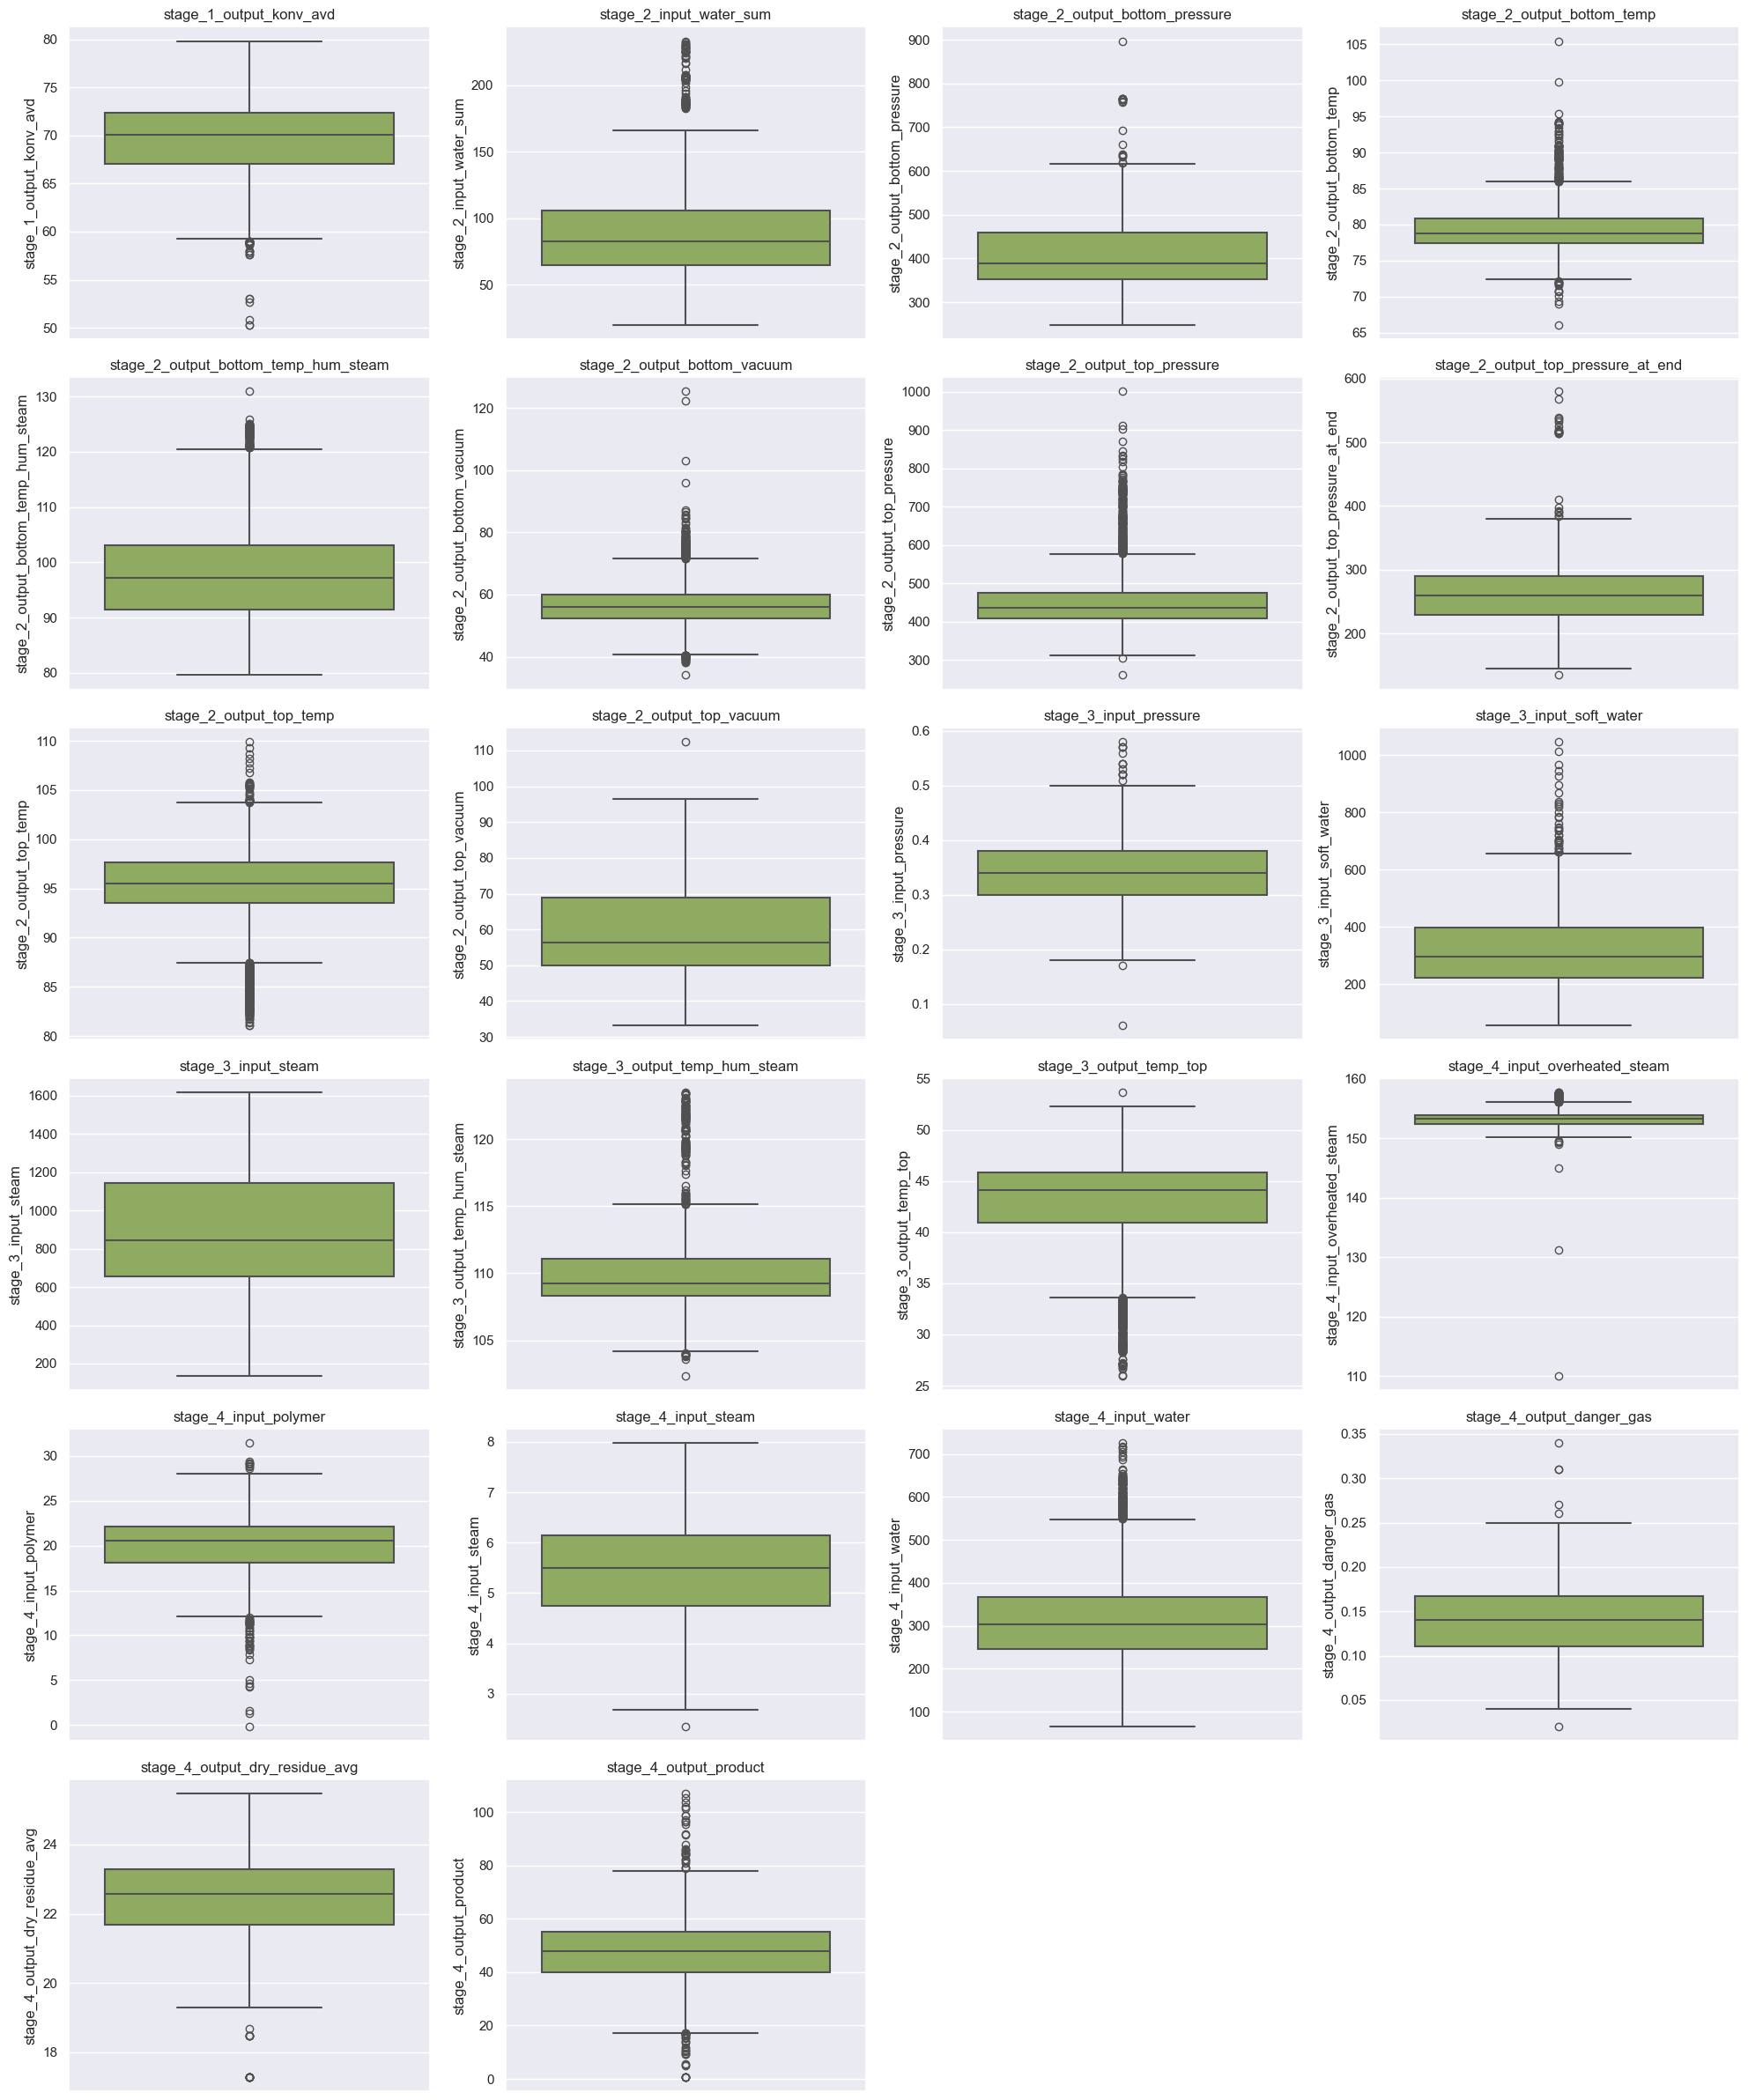

In [63]:
excluded_columns = ['datetime', 'work_shift']
columns_to_plot = [col for col in df.columns if col not in excluded_columns]


num_plots = len(columns_to_plot)
cols = 4
rows = math.ceil(num_plots / cols)
plt.figure(figsize=(cols * 5, rows * 4))
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(y=df[col], color=color_for_histplot, linewidth=1.5)
    plt.title(col)
    plt.tight_layout()

plt.show()

Разделяем на слабые (3 iqr) и супер (6 iqr) выбросы

При анализе показались странными выбросы:  
* stage_2_output_bottom_pressure >800  
* stage_2_output_bottom_temp_hum_steam > 130  
* stage_2_output_bottom_vacuum(нарушение) > 80  
* stage_2_output_top_pressure_at_end(нарушение) > 500  
* stage_2_output_top_vacuum(нарушение) > 80  
* stage_3_input_pressure(нарушение) < 0.1  
* stage_4_input_overheated_steam(нарушение) < 147  
* stage_4_input_polymer < 5  
* stage_4_output_dry_residue_avg < 18  
  
Проверим их, в случае если нет таргета (данных по газу) - удалим

In [64]:
df[df['stage_2_output_bottom_pressure'] > 800]

stage_1_output_konv_avd  stage_2_input_water_sum  \
datetime                                                                
2022-06-19 04:00:00                    67.33                    61.36   

                     stage_2_output_bottom_pressure  \
datetime                                              
2022-06-19 04:00:00                          897.29   

                     stage_2_output_bottom_temp  \
datetime                                          
2022-06-19 04:00:00                      105.46   

                     stage_2_output_bottom_temp_hum_steam  \
datetime                                                    
2022-06-19 04:00:00                                105.31   

                     stage_2_output_bottom_vacuum  \
datetime                                            
2022-06-19 04:00:00                         73.73   

                     stage_2_output_top_pressure  \
datetime                                           
2022-06-19 04:00:00                       830.38   

                     stage_2_output_top_pressure_at_end  \
datetime                                                  
2022-06-19 04:00:00                              301.13   

                     stage_2_output_top_temp  stage_2_output_top_vacuum  ...  \
datetime                                                                 ...   
2022-06-19 04:00:00                   106.78                     112.38  ...   

                     stage_3_output_temp_hum_steam  stage_3_output_temp_top  \
datetime                                                                      
2022-06-19 04:00:00                         108.33                    44.92   

                     stage_4_input_overheated_steam  stage_4_input_polymer  \
datetime                                                                     
2022-06-19 04:00:00                          152.95                  13.72   

                     stage_4_input_steam  stage_4_input_water  \
datetime                                                        
2022-06-19 04:00:00                 5.47                305.4   

                     stage_4_output_danger_gas  \
datetime                                         
2022-06-19 04:00:00                        NaN   

                     stage_4_output_dry_residue_avg  stage_4_output_product  \
datetime                                                                      
2022-06-19 04:00:00                           22.98                   34.19   

                     work_shift  
datetime                         
2022-06-19 04:00:00         1.0  

[1 rows x 23 columns]

In [65]:
df[df['stage_2_output_bottom_temp_hum_steam'] > 130]

stage_1_output_konv_avd  stage_2_input_water_sum  \
datetime                                                                
2021-03-11 08:00:00                    68.63                   113.72   

                     stage_2_output_bottom_pressure  \
datetime                                              
2021-03-11 08:00:00                          470.37   

                     stage_2_output_bottom_temp  \
datetime                                          
2021-03-11 08:00:00                       78.82   

                     stage_2_output_bottom_temp_hum_steam  \
datetime                                                    
2021-03-11 08:00:00                                130.93   

                     stage_2_output_bottom_vacuum  \
datetime                                            
2021-03-11 08:00:00                         54.25   

                     stage_2_output_top_pressure  \
datetime                                           
2021-03-11 08:00:00                       394.83   

                     stage_2_output_top_pressure_at_end  \
datetime                                                  
2021-03-11 08:00:00                              279.47   

                     stage_2_output_top_temp  stage_2_output_top_vacuum  ...  \
datetime                                                                 ...   
2021-03-11 08:00:00                    99.39                       61.5  ...   

                     stage_3_output_temp_hum_steam  stage_3_output_temp_top  \
datetime                                                                      
2021-03-11 08:00:00                         109.81                    41.15   

                     stage_4_input_overheated_steam  stage_4_input_polymer  \
datetime                                                                     
2021-03-11 08:00:00                          156.46                   21.2   

                     stage_4_input_steam  stage_4_input_water  \
datetime                                                        
2021-03-11 08:00:00                 6.08                222.1   

                     stage_4_output_danger_gas  \
datetime                                         
2021-03-11 08:00:00                        NaN   

                     stage_4_output_dry_residue_avg  stage_4_output_product  \
datetime                                                                      
2021-03-11 08:00:00                           21.28                   67.35   

                     work_shift  
datetime                         
2021-03-11 08:00:00         1.0  

[1 rows x 23 columns]

In [66]:
df[df['stage_2_output_bottom_vacuum'] > 80]

stage_1_output_konv_avd  stage_2_input_water_sum  \
datetime                                                                
2021-03-02 11:00:00                    73.63                   117.51   
2021-03-02 13:00:00                    74.93                   114.79   
2021-03-02 14:00:00                    75.03                   111.95   
2021-11-18 15:00:00                    60.63                   105.40   
2021-11-18 16:00:00                    60.83                   133.72   
2021-11-18 17:00:00                    62.83                      NaN   
2021-11-18 18:00:00                    64.83                   124.28   
2021-11-18 19:00:00                    64.83                   120.88   
2021-11-18 20:00:00                    65.63                   117.48   
2021-11-18 21:00:00                    65.83                   117.02   
2021-11-19 01:00:00                    66.23                   125.21   
2021-11-19 02:00:00                    66.33                   122.50   
2021-11-19 05:00:00                    65.33                   123.46   
2021-11-19 06:00:00                    64.33                   126.26   
2021-12-08 23:00:00                    77.33                    35.85   
2021-12-16 16:00:00                    70.33                    53.12   
2022-02-24 15:00:00                    69.33                    92.63   
2022-02-24 16:00:00                    69.63                    93.03   
2022-08-04 16:00:00                    61.03                    53.51   
2023-03-14 17:00:00                    67.23                    22.85   
2023-03-14 18:00:00                    66.83                    22.64   
2023-03-14 19:00:00                    66.83                    22.96   
2023-03-15 13:00:00                    71.83                    23.28   

                     stage_2_output_bottom_pressure  \
datetime                                              
2021-03-02 11:00:00                          554.43   
2021-03-02 13:00:00                          660.03   
2021-03-02 14:00:00                          692.52   
2021-11-18 15:00:00                          382.60   
2021-11-18 16:00:00                          378.13   
2021-11-18 17:00:00                          371.08   
2021-11-18 18:00:00                          364.03   
2021-11-18 19:00:00                          369.21   
2021-11-18 20:00:00                          374.38   
2021-11-18 21:00:00                          358.26   
2021-11-19 01:00:00                          344.78   
2021-11-19 02:00:00                          341.53   
2021-11-19 05:00:00                          349.90   
2021-11-19 06:00:00                          364.51   
2021-12-08 23:00:00                          454.60   
2021-12-16 16:00:00                          441.27   
2022-02-24 15:00:00                          521.67   
2022-02-24 16:00:00                          533.75   
2022-08-04 16:00:00                          566.18   
2023-03-14 17:00:00                          473.08   
2023-03-14 18:00:00                          553.15   
2023-03-14 19:00:00                          458.29   
2023-03-15 13:00:00                          449.07   

                     stage_2_output_bottom_temp  \
datetime                                          
2021-03-02 11:00:00                       85.77   
2021-03-02 13:00:00                       92.55   
2021-03-02 14:00:00                       95.39   
2021-11-18 15:00:00                       81.07   
2021-11-18 16:00:00                       80.81   
2021-11-18 17:00:00                       79.72   
2021-11-18 18:00:00                       78.62   
2021-11-18 19:00:00                       79.49   
2021-11-18 20:00:00                       80.37   
2021-11-18 21:00:00                       78.80   
2021-11-19 01:00:00                       78.29   
2021-11-19 02:00:00                       78.02   
2021-11-19 05:00:00                       78.87   
2021-11-19 06:00:00                       79.97   
202

In [67]:
df[df['stage_2_output_top_pressure_at_end'] > 500]

stage_1_output_konv_avd  stage_2_input_water_sum  \
datetime                                                                
2021-04-13 07:00:00                    68.03                    99.10   
2021-04-13 08:00:00                    68.03                    98.49   
2021-04-13 09:00:00                    65.93                    98.04   
2021-04-13 10:00:00                    65.03                    97.60   
2021-04-13 11:00:00                    65.03                   102.69   
2021-04-13 12:00:00                    65.63                   107.77   
2021-04-13 16:00:00                    68.33                   104.98   
2021-04-13 17:00:00                    68.73                   105.04   
2021-04-13 18:00:00                    69.03                   105.10   
2021-04-13 19:00:00                    69.03                   107.19   
2021-04-13 20:00:00                    69.03                   109.28   
2021-04-13 21:00:00                    68.93                   112.35   
2021-04-13 22:00:00                    68.83                   115.42   
2021-04-13 23:00:00                    68.83                   113.74   
2021-04-14 00:00:00                    68.83                   112.05   
2022-03-17 08:00:00                    75.63                    68.73   
2022-03-17 21:00:00                    74.83                    69.46   

                     stage_2_output_bottom_pressure  \
datetime                                              
2021-04-13 07:00:00                          477.45   
2021-04-13 08:00:00                          477.39   
2021-04-13 09:00:00                          478.73   
2021-04-13 10:00:00                          480.07   
2021-04-13 11:00:00                          481.32   
2021-04-13 12:00:00                          482.57   
2021-04-13 16:00:00                          484.95   
2021-04-13 17:00:00                          486.95   
2021-04-13 18:00:00                          488.94   
2021-04-13 19:00:00                          487.21   
2021-04-13 20:00:00                          485.49   
2021-04-13 21:00:00                          484.42   
2021-04-13 22:00:00                          483.35   
2021-04-13 23:00:00                          481.59   
2021-04-14 00:00:00                          479.83   
2022-03-17 08:00:00                          329.93   
2022-03-17 21:00:00                          346.06   

                     stage_2_output_bottom_temp  \
datetime                                          
2021-04-13 07:00:00                       77.73   
2021-04-13 08:00:00                       77.74   
2021-04-13 09:00:00                       77.55   
2021-04-13 10:00:00                       77.37   
2021-04-13 11:00:00                       77.12   
2021-04-13 12:00:00                       76.88   
2021-04-13 16:00:00                       76.90   
2021-04-13 17:00:00                       76.77   
2021-04-13 18:00:00                       76.63   
2021-04-13 19:00:00                       76.68   
2021-04-13 20:00:00                       76.73   
2021-04-13 21:00:00                       76.85   
2021-04-13 22:00:00                       76.98   
2021-04-13 23:00:00                       76.67   
2021-04-14 00:00:00                       76.36   
2022-03-17 08:00:00                       77.42   
2022-03-17 21:00:00                       78.30   

                     stage_2_output_bottom_temp_hum_steam  \
datetime                                                    
2021-04-13 07:00:00                                 97.23   
2021-04-13 08:00:00                                 96.78   
2021-04-13 09:00:00                                 89.10   
2021-04-13 10:00:00                                 81.42   
2021-04-13 11:00:00                                 89.66   
2021-04-13 12:00:00                                 97.91   
2021-04-13 16:00:00                                 98.63   
2021-04-13 17:00:00                                 98.74   
2021-04

In [68]:
df[df['stage_2_output_top_vacuum'] > 80]

stage_1_output_konv_avd  stage_2_input_water_sum  \
datetime                                                                
2021-03-02 13:00:00                    74.93                   114.79   
2021-03-02 14:00:00                    75.03                   111.95   
2022-03-11 14:00:00                    71.33                    24.95   
2022-03-11 15:00:00                    71.33                    32.43   
2022-03-11 17:00:00                    71.23                    39.96   
...                                      ...                      ...   
2022-08-15 12:00:00                    65.33                    78.19   
2022-11-13 20:00:00                    65.33                    61.24   
2022-11-14 08:00:00                    63.83                    62.56   
2022-11-14 20:00:00                    64.33                    53.68   
2022-11-15 09:00:00                    64.73                    60.15   

                     stage_2_output_bottom_pressure  \
datetime                                              
2021-03-02 13:00:00                          660.03   
2021-03-02 14:00:00                          692.52   
2022-03-11 14:00:00                          635.63   
2022-03-11 15:00:00                          611.65   
2022-03-11 17:00:00                          609.59   
...                                             ...   
2022-08-15 12:00:00                          431.87   
2022-11-13 20:00:00                          346.77   
2022-11-14 08:00:00                          396.76   
2022-11-14 20:00:00                          339.99   
2022-11-15 09:00:00                          324.22   

                     stage_2_output_bottom_temp  \
datetime                                          
2021-03-02 13:00:00                       92.55   
2021-03-02 14:00:00                       95.39   
2022-03-11 14:00:00                       94.32   
2022-03-11 15:00:00                       94.17   
2022-03-11 17:00:00                       94.04   
...                                         ...   
2022-08-15 12:00:00                       83.90   
2022-11-13 20:00:00                       77.74   
2022-11-14 08:00:00                       81.35   
2022-11-14 20:00:00                       76.97   
2022-11-15 09:00:00                       75.30   

                     stage_2_output_bottom_temp_hum_steam  \
datetime                                                    
2021-03-02 13:00:00                                 98.14   
2021-03-02 14:00:00                                101.40   
2022-03-11 14:00:00                                 99.36   
2022-03-11 15:00:00                                 99.11   
2022-03-11 17:00:00                                 98.96   
...                                                   ...   
2022-08-15 12:00:00                                110.21   
2022-11-13 20:00:00                                 84.63   
2022-11-14 08:00:00                                 82.64   
2022-11-14 20:00:00                                 84.28   
2022-11-15 09:00:00                                 84.79   

                     stage_2_output_bottom_vacuum  \
datetime                                            
2021-03-02 13:00:00                        122.38   
2021-03-02 14:00:00                        125.36   
2022-03-11 14:00:00                         61.89   
2022-03-11 15:00:00                         55.75   
2022-03-11 17:00:00                         48.42   
...                                           ...   
2022-08-15 12:00:00                         54.95   
2022-11-13 20:00:00                           NaN   
2022-11-14 08:00:00                         69.34   
2022-11-14 20:00:00                         56.18   
2022-11-15 09:00:00                         52.13   

                     stage_2_output_top_pressure  \
datetime                                           
2021-03-02 13:00:00                       767.24   
2021-03-02 14:00:00                       803.84   

In [69]:
df[df['stage_3_input_pressure'] < 0.1]

stage_1_output_konv_avd  stage_2_input_water_sum  \
datetime                                                                
2022-07-15 02:00:00                    64.63                    69.46   

                     stage_2_output_bottom_pressure  \
datetime                                              
2022-07-15 02:00:00                          336.89   

                     stage_2_output_bottom_temp  \
datetime                                          
2022-07-15 02:00:00                       76.93   

                     stage_2_output_bottom_temp_hum_steam  \
datetime                                                    
2022-07-15 02:00:00                                 87.41   

                     stage_2_output_bottom_vacuum  \
datetime                                            
2022-07-15 02:00:00                         44.65   

                     stage_2_output_top_pressure  \
datetime                                           
2022-07-15 02:00:00                       421.43   

                     stage_2_output_top_pressure_at_end  \
datetime                                                  
2022-07-15 02:00:00                              160.75   

                     stage_2_output_top_temp  stage_2_output_top_vacuum  ...  \
datetime                                                                 ...   
2022-07-15 02:00:00                     84.5                      70.32  ...   

                     stage_3_output_temp_hum_steam  stage_3_output_temp_top  \
datetime                                                                      
2022-07-15 02:00:00                         102.33                    43.19   

                     stage_4_input_overheated_steam  stage_4_input_polymer  \
datetime                                                                     
2022-07-15 02:00:00                          152.28                  15.71   

                     stage_4_input_steam  stage_4_input_water  \
datetime                                                        
2022-07-15 02:00:00                 5.25               249.56   

                     stage_4_output_danger_gas  \
datetime                                         
2022-07-15 02:00:00                        NaN   

                     stage_4_output_dry_residue_avg  stage_4_output_product  \
datetime                                                                      
2022-07-15 02:00:00                           20.68                   47.91   

                     work_shift  
datetime                         
2022-07-15 02:00:00         2.0  

[1 rows x 23 columns]

In [70]:
df[df['stage_4_input_overheated_steam'] < 147]

stage_1_output_konv_avd  stage_2_input_water_sum  \
datetime                                                                
2022-02-12 12:00:00                    71.83                    62.69   
2022-06-28 18:00:00                    72.33                    44.78   
2022-06-28 19:00:00                    72.33                    59.14   

                     stage_2_output_bottom_pressure  \
datetime                                              
2022-02-12 12:00:00                          334.45   
2022-06-28 18:00:00                          277.50   
2022-06-28 19:00:00                          290.80   

                     stage_2_output_bottom_temp  \
datetime                                          
2022-02-12 12:00:00                       76.36   
2022-06-28 18:00:00                       66.13   
2022-06-28 19:00:00                       69.32   

                     stage_2_output_bottom_temp_hum_steam  \
datetime                                                    
2022-02-12 12:00:00                                112.23   
2022-06-28 18:00:00                                 81.60   
2022-06-28 19:00:00                                 84.12   

                     stage_2_output_bottom_vacuum  \
datetime                                            
2022-02-12 12:00:00                         51.60   
2022-06-28 18:00:00                         39.95   
2022-06-28 19:00:00                         41.69   

                     stage_2_output_top_pressure  \
datetime                                           
2022-02-12 12:00:00                       427.14   
2022-06-28 18:00:00                       438.93   
2022-06-28 19:00:00                       471.81   

                     stage_2_output_top_pressure_at_end  \
datetime                                                  
2022-02-12 12:00:00                              231.92   
2022-06-28 18:00:00                              155.93   
2022-06-28 19:00:00                              183.69   

                     stage_2_output_top_temp  stage_2_output_top_vacuum  ...  \
datetime                                                                 ...   
2022-02-12 12:00:00                    94.34                      54.40  ...   
2022-06-28 18:00:00                    83.29                      42.11  ...   
2022-06-28 19:00:00                    86.42                      46.85  ...   

                     stage_3_output_temp_hum_steam  stage_3_output_temp_top  \
datetime                                                                      
2022-02-12 12:00:00                         109.32                    42.24   
2022-06-28 18:00:00                         105.77                    50.20   
2022-06-28 19:00:00                         105.72                    47.22   

                     stage_4_input_overheated_steam  stage_4_input_polymer  \
datetime                                                                     
2022-02-12 12:00:00                          144.98                  20.69   
2022-06-28 18:00:00                          110.04                  11.86   
2022-06-28 19:00:00                          131.16                  11.59   

                     stage_4_input_steam  stage_4_input_water  \
datetime                                                        
2022-02-12 12:00:00                 4.45               138.25   
2022-06-28 18:00:00                 3.54               157.04   
2022-06-28 19:00:00                 3.54               157.94   

                     stage_4_output_danger_gas  \
datetime                                         
2022-02-12 12:00:00                       0.12   
2022-06-28 18:00:00                        NaN   
2022-06-28 19:00:00                        NaN   

                     stage_4_output_dry_residue_avg  stage_4_output_product  \
datetime                                                                      
2022-02-12 12:00:00                           22.08                   2

In [71]:
df[df['stage_4_input_polymer'] < 5]

stage_1_output_konv_avd  stage_2_input_water_sum  \
datetime                                                                
2021-03-02 13:00:00                    74.93                   114.79   
2021-03-16 02:00:00                    74.03                    90.88   
2021-04-05 16:00:00                    71.03                   165.79   
2021-12-02 14:00:00                      NaN                    70.29   
2022-03-11 16:00:00                    71.33                    39.91   
2022-09-29 13:00:00                    68.43                    90.94   

                     stage_2_output_bottom_pressure  \
datetime                                              
2021-03-02 13:00:00                          660.03   
2021-03-16 02:00:00                          433.48   
2021-04-05 16:00:00                          248.76   
2021-12-02 14:00:00                          320.88   
2022-03-11 16:00:00                          587.67   
2022-09-29 13:00:00                          347.37   

                     stage_2_output_bottom_temp  \
datetime                                          
2021-03-02 13:00:00                       92.55   
2021-03-16 02:00:00                       74.88   
2021-04-05 16:00:00                       70.69   
2021-12-02 14:00:00                       75.06   
2022-03-11 16:00:00                       94.03   
2022-09-29 13:00:00                       75.82   

                     stage_2_output_bottom_temp_hum_steam  \
datetime                                                    
2021-03-02 13:00:00                                 98.14   
2021-03-16 02:00:00                                117.87   
2021-04-05 16:00:00                                 91.95   
2021-12-02 14:00:00                                100.19   
2022-03-11 16:00:00                                 98.85   
2022-09-29 13:00:00                                 87.39   

                     stage_2_output_bottom_vacuum  \
datetime                                            
2021-03-02 13:00:00                        122.38   
2021-03-16 02:00:00                         48.22   
2021-04-05 16:00:00                         45.84   
2021-12-02 14:00:00                         49.11   
2022-03-11 16:00:00                         49.62   
2022-09-29 13:00:00                         50.69   

                     stage_2_output_top_pressure  \
datetime                                           
2021-03-02 13:00:00                       767.24   
2021-03-16 02:00:00                       373.53   
2021-04-05 16:00:00                       260.22   
2021-12-02 14:00:00                       390.72   
2022-03-11 16:00:00                       691.54   
2022-09-29 13:00:00                       567.14   

                     stage_2_output_top_pressure_at_end  \
datetime                                                  
2021-03-02 13:00:00                              263.23   
2021-03-16 02:00:00                              279.29   
2021-04-05 16:00:00                              221.03   
2021-12-02 14:00:00                              163.25   
2022-03-11 16:00:00                              187.53   
2022-09-29 13:00:00                              296.28   

                     stage_2_output_top_temp  stage_2_output_top_vacuum  ...  \
datetime                                                                 ...   
2021-03-02 13:00:00                    99.31                      85.52  ...   
2021-03-16 02:00:00                    97.27                      63.94  ...   
2021-04-05 16:00:00                    97.43                      46.55  ...   
2021-12-02 14:00:00                    90.30                      42.89  ...   
2022-03-11 16:00:00                   100.26                      79.35  ...   
2022-09-29 13:00:00                    88.92                      37.58  ...   

                     stage_3_output_temp_hum_steam  stage_3_output_temp_top  \
datetime                                                      

In [72]:
df[df['stage_4_output_dry_residue_avg'] < 19]

stage_1_output_konv_avd  stage_2_input_water_sum  \
datetime                                                                
2021-03-29 14:00:00                    69.03                    81.59   
2021-03-29 15:00:00                    69.03                    80.99   
2021-03-29 16:00:00                    69.63                    80.39   
2021-03-29 17:00:00                    69.83                    80.53   
2021-03-29 18:00:00                    70.03                    80.67   
2021-03-29 19:00:00                    70.03                    81.65   
2021-03-29 20:00:00                    68.83                    82.64   
2021-03-29 21:00:00                    67.43                    82.94   
2021-03-29 22:00:00                    66.03                    83.25   
2021-03-29 23:00:00                    66.03                    81.82   
2021-03-30 00:00:00                    66.33                    80.39   
2022-07-01 21:00:00                    61.23                    68.95   
2022-07-02 08:00:00                    66.83                    70.02   
2022-09-30 10:00:00                    66.63                    96.25   
2022-09-30 11:00:00                    66.63                    96.75   
2022-09-30 12:00:00                    66.33                    97.26   
2022-10-14 12:00:00                      NaN                    57.99   

                     stage_2_output_bottom_pressure  \
datetime                                              
2021-03-29 14:00:00                          347.78   
2021-03-29 15:00:00                          334.39   
2021-03-29 16:00:00                          321.00   
2021-03-29 17:00:00                          339.78   
2021-03-29 18:00:00                          358.55   
2021-03-29 19:00:00                          354.33   
2021-03-29 20:00:00                          350.10   
2021-03-29 21:00:00                          345.70   
2021-03-29 22:00:00                          341.30   
2021-03-29 23:00:00                          366.08   
2021-03-30 00:00:00                          390.87   
2022-07-01 21:00:00                          407.56   
2022-07-02 08:00:00                          354.75   
2022-09-30 10:00:00                          353.79   
2022-09-30 11:00:00                          351.71   
2022-09-30 12:00:00                          349.63   
2022-10-14 12:00:00                          383.07   

                     stage_2_output_bottom_temp  \
datetime                                          
2021-03-29 14:00:00                       77.10   
2021-03-29 15:00:00                       75.66   
2021-03-29 16:00:00                       74.22   
2021-03-29 17:00:00                       76.08   
2021-03-29 18:00:00                       77.93   
2021-03-29 19:00:00                       77.61   
2021-03-29 20:00:00                       77.30   
2021-03-29 21:00:00                       76.88   
2021-03-29 22:00:00                       76.46   
2021-03-29 23:00:00                       78.16   
2021-03-30 00:00:00                       79.86   
2022-07-01 21:00:00                       80.88   
2022-07-02 08:00:00                       77.46   
2022-09-30 10:00:00                       79.39   
2022-09-30 11:00:00                       79.18   
2022-09-30 12:00:00                       78.96   
2022-10-14 12:00:00                       80.29   

                     stage_2_output_bottom_temp_hum_steam  \
datetime                                                    
2021-03-29 14:00:00                                119.81   
2021-03-29 15:00:00                                118.96   
2021-03-29 16:00:00                                118.11   
2021-03-29 17:00:00                                119.30   
2021-03-29 18:00:00                                120.49   
2021-03-29 19:00:00                                116.10   
2021-03-29 20:00:00                                111.72   
2021-03-29 21:00:00                                107.17   
2021-03

In [73]:
df = df[~(
    (
        (df['stage_2_output_bottom_pressure'] > 800) |
        (df['stage_2_output_bottom_temp_hum_steam'] > 130) |
        (df['stage_2_output_bottom_vacuum'] > 80) |
        (df['stage_2_output_top_pressure_at_end'] > 500) |
        (df['stage_2_output_top_vacuum'] > 80) |
        (df['stage_3_input_pressure'] < 0.1) |
        (df['stage_4_input_overheated_steam'] < 147) |
        (df['stage_4_input_polymer'] < 5) |
        (df['stage_4_output_dry_residue_avg'] < 19)
    ) & 
    (df['stage_4_output_danger_gas'].isna())
)]

Причины выбросов:  
* Давление - разгерметизация аппарата, > 101 кПа (Равно атмосферному)  
* Остальное - ошибки производства  
  
Количество выбросов в некоторых категориях большое, что говорит о том, что это нормальные условия протекания тех. процесса
Если мы их уберем, то потеряем существенную часть данных, из за чего мы не сможем дать правельный анализ

### Верхние и нижние границы

* stage_2_output_bottom_pressure < 800  
* stage_2_output_bottom_temp_hum_steam < 130  
* stage_2_output_bottom_vacuum(нарушение) < 80  
* stage_2_output_top_pressure_at_end(нарушение) < 500  
* stage_2_output_top_vacuum(нарушение) < 80  
* stage_3_input_pressure(нарушение) > 0.1  
* stage_4_input_overheated_steam(нарушение) > 147  
* stage_4_input_polymer > 5  
* stage_4_output_dry_residue_avg > 18  

###  Аналитический и графический анализ данных

Добавить границы значений. Сделать выводы.!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

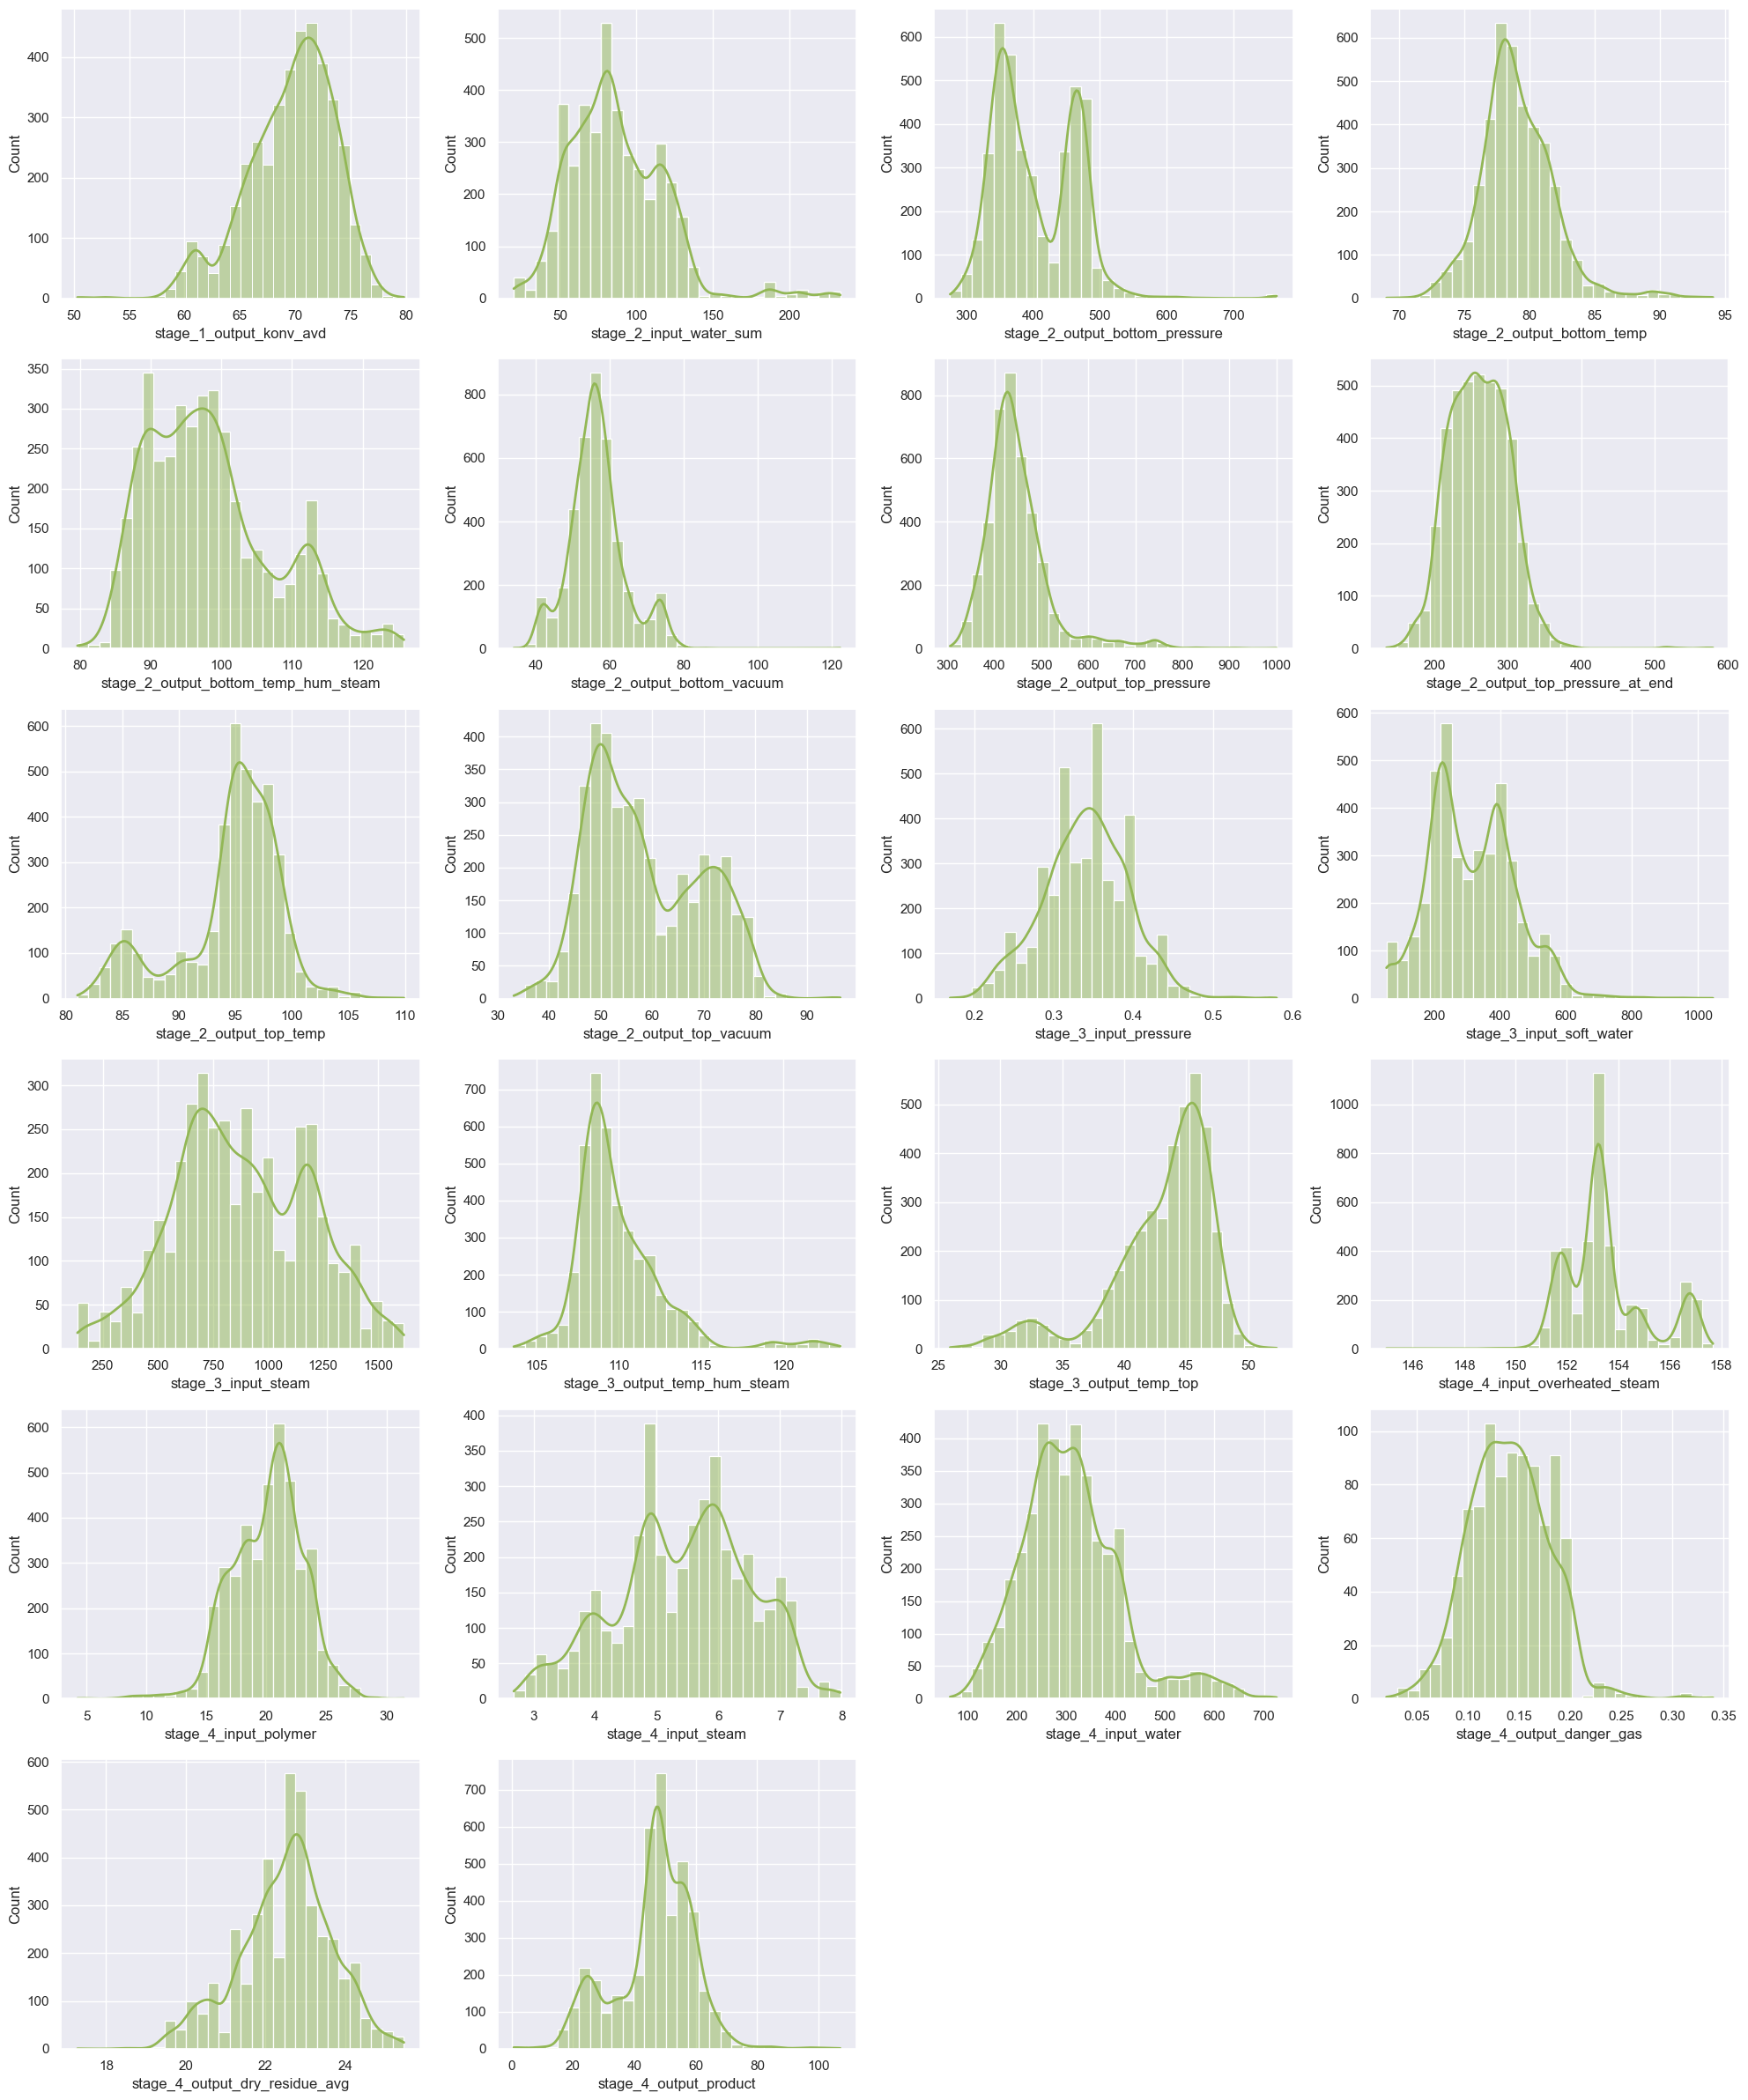

In [74]:
excluded_columns = ['datetime', 'work_shift']
columns_to_plot = [col for col in df.columns if col not in excluded_columns]


num_plots = len(columns_to_plot)
cols = 4
rows = math.ceil(num_plots / cols)
plt.figure(figsize=(cols * 5, rows * 4))
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df[col], kde=True, bins=30, color=color_for_histplot, line_kws=line)
    plt.tight_layout()

plt.show()

### Пропуски

In [75]:
df.isna().sum()

stage_1_output_konv_avd                   75
stage_2_input_water_sum                   61
stage_2_output_bottom_pressure            59
stage_2_output_bottom_temp                31
stage_2_output_bottom_temp_hum_steam      15
stage_2_output_bottom_vacuum              71
stage_2_output_top_pressure               20
stage_2_output_top_pressure_at_end        14
stage_2_output_top_temp                   44
stage_2_output_top_vacuum                 35
stage_3_input_pressure                    74
stage_3_input_soft_water                  51
stage_3_input_steam                       11
stage_3_output_temp_hum_steam             13
stage_3_output_temp_top                   67
stage_4_input_overheated_steam             9
stage_4_input_polymer                     66
stage_4_input_steam                       82
stage_4_input_water                       80
stage_4_output_danger_gas               3158
stage_4_output_dry_residue_avg             0
stage_4_output_product                     0
work_shift

===============================================================================================================================

In [76]:
max_gap = pd.Timedelta(hours=12)

In [77]:
def smart_fill(series):
    is_na = series.isna()
    groups = (is_na != is_na.shift()).cumsum()
    result = series.copy()

    for grp in result[is_na].groupby(groups):
        idx = pd.to_datetime(grp[1].index) 
        duration = idx[-1] - idx[0]

        if duration <= max_gap:
            try:
                interpolated = series.interpolate(method='time')
                result.loc[idx] = interpolated.loc[idx]
            except Exception as e:
                print(f"Ошибка при интерполяции: {e}")
                result.loc[idx] = series.median()
        else:
            result.loc[idx] = series.median()

    return result

In [78]:
for col in df.select_dtypes(include=[np.number]).columns:
    if col != 'stage_4_output_danger_gas':
        df[col] = smart_fill(df[col])

In [79]:
df.isna().sum()

stage_1_output_konv_avd                    0
stage_2_input_water_sum                    0
stage_2_output_bottom_pressure             0
stage_2_output_bottom_temp                 0
stage_2_output_bottom_temp_hum_steam       0
stage_2_output_bottom_vacuum               0
stage_2_output_top_pressure                0
stage_2_output_top_pressure_at_end         0
stage_2_output_top_temp                    0
stage_2_output_top_vacuum                  0
stage_3_input_pressure                     0
stage_3_input_soft_water                   0
stage_3_input_steam                        0
stage_3_output_temp_hum_steam              0
stage_3_output_temp_top                    0
stage_4_input_overheated_steam             0
stage_4_input_polymer                      0
stage_4_input_steam                        0
stage_4_input_water                        0
stage_4_output_danger_gas               3158
stage_4_output_dry_residue_avg             0
stage_4_output_product                     0
work_shift

=====================================================================================================================================================================================

'stage_4_input_water' - подача воды, в м3  
Вероятно, ошибки или сбои, тк воду точно подавали, распределение не нормальное - используем медиану

310.55661618535
301.545


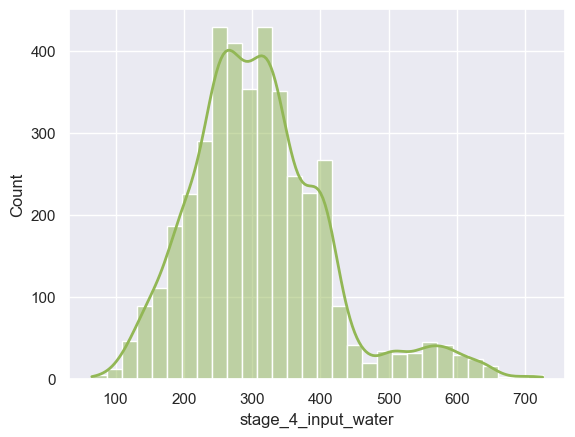

In [80]:
print(df['stage_4_input_water'].mean())
print(df['stage_4_input_water'].median())

sns.histplot(df['stage_4_input_water'], kde=True, bins=30, color=color_for_histplot, line_kws=line)
plt.show()

In [81]:
df['stage_4_input_water'] = df['stage_4_input_water'].fillna(df['stage_4_input_water'].median())
df['stage_4_input_water'].isna().sum()


0

'stage_4_input_steam' - подача пара, в м3  
Распределение не нормальное - используем медиану

5.429977837354329
5.54


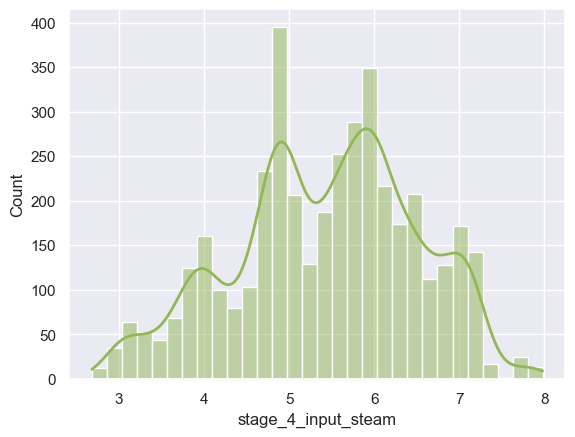

In [82]:
print(df['stage_4_input_steam'].mean())
print(df['stage_4_input_steam'].median())
sns.histplot(df['stage_4_input_steam'], kde=True, bins=30, color=color_for_histplot, line_kws=line)
plt.show()

In [83]:
df['stage_4_input_steam'] = df['stage_4_input_steam'].fillna(df['stage_4_input_steam'].median())
df['stage_4_input_steam'].isna().sum()

0

'stage_4_input_polymer' - подача полимера, в м3  
Распределение не нормальное - используем медиану

20.14486830878305
20.49


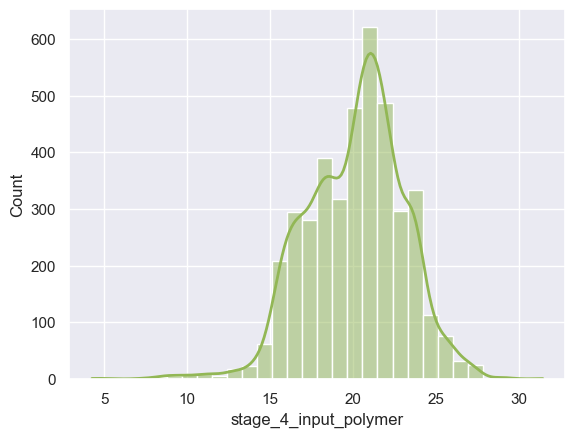

In [84]:
print(df['stage_4_input_polymer'].mean())
print(df['stage_4_input_polymer'].median())
sns.histplot(df['stage_4_input_polymer'], kde=True, bins=30, color=color_for_histplot, line_kws=line)
plt.show()

In [85]:
df['stage_4_input_polymer'] = df['stage_4_input_polymer'].fillna(df['stage_4_input_polymer'].median())
df['stage_4_input_polymer'].isna().sum()

0

'stage_4_input_overheated_steam' - подача перегретого пара, в м3  
Распределение не нормальное - используем медиану

153.48957677952546
153.22


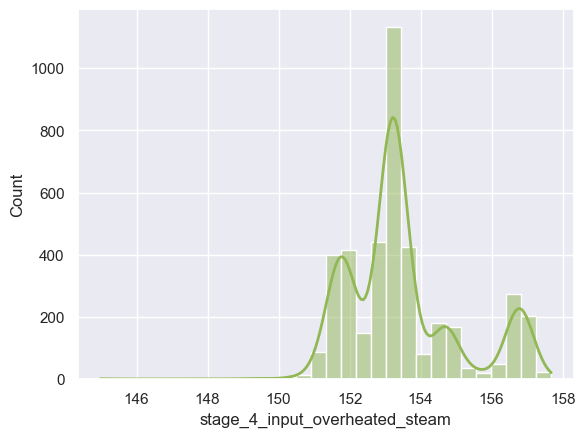

In [86]:
print(df['stage_4_input_overheated_steam'].mean())
print(df['stage_4_input_overheated_steam'].median())
sns.histplot(df['stage_4_input_overheated_steam'], kde=True, bins=30, color=color_for_histplot, line_kws=line)
plt.show()

In [87]:
df['stage_4_input_overheated_steam'] = df['stage_4_input_overheated_steam'].fillna(df['stage_4_input_overheated_steam'].median())
df['stage_4_input_overheated_steam'].isna().sum()

0

'stage_3_output_temp_top' - температура верха в агрегате, в градусах Цельсия  
Распределение не нормальное - используем медиану

42.96528990736355
44.17


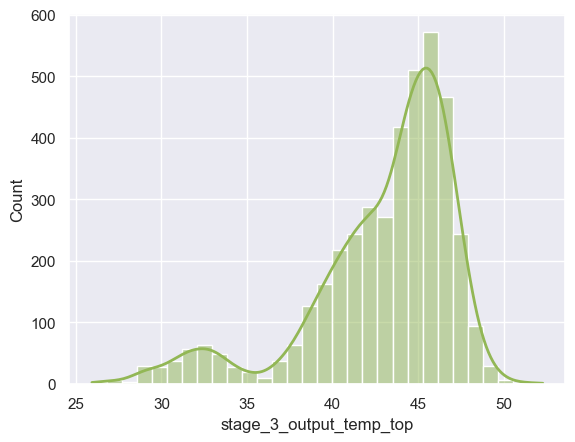

In [88]:
print(df['stage_3_output_temp_top'].mean())
print(df['stage_3_output_temp_top'].median())
sns.histplot(df['stage_3_output_temp_top'], kde=True, bins=30, color=color_for_histplot, line_kws=line)
plt.show()

In [89]:
df['stage_3_output_temp_top'] = df['stage_3_output_temp_top'].fillna(df['stage_3_output_temp_top'].median())

'stage_3_output_temp_hum_steam' - температура насыщенного пара, в градусах Цельсия  
Распределение не нормальное - используем медиану

109.99626106137777
109.24


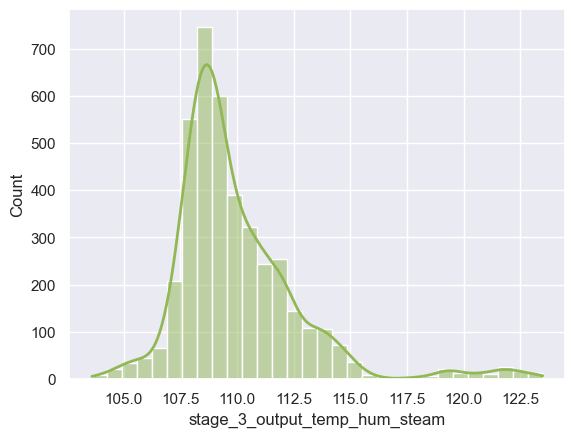

In [90]:
print(df['stage_3_output_temp_hum_steam'].mean())
print(df['stage_3_output_temp_hum_steam'].median())
sns.histplot(df['stage_3_output_temp_hum_steam'], kde=True, bins=30, color=color_for_histplot, line_kws=line)
plt.show()

In [91]:
df['stage_3_output_temp_hum_steam'] = df['stage_3_output_temp_hum_steam'].fillna(df['stage_3_output_temp_hum_steam'].median())

'stage_3_input_steam'- подаваемый пар, в м3  
Распределение не нормальное - используем медиану 

881.143931085044
859.01


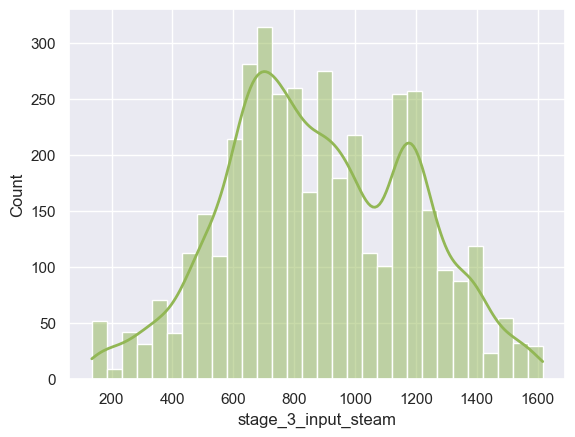

In [92]:
print(df['stage_3_input_steam'].mean())
print(df['stage_3_input_steam'].median())
sns.histplot(df['stage_3_input_steam'], kde=True, bins=30, color=color_for_histplot, line_kws=line)
plt.show()

In [93]:
df['stage_3_input_steam'] = df['stage_3_input_steam'].fillna(df['stage_3_input_steam'].median())

'stage_3_input_soft_water' - подаваемая смягченная вода, в м3  
Распределение не нормальное - используем медиану

314.57131122461766
297.28499999999997


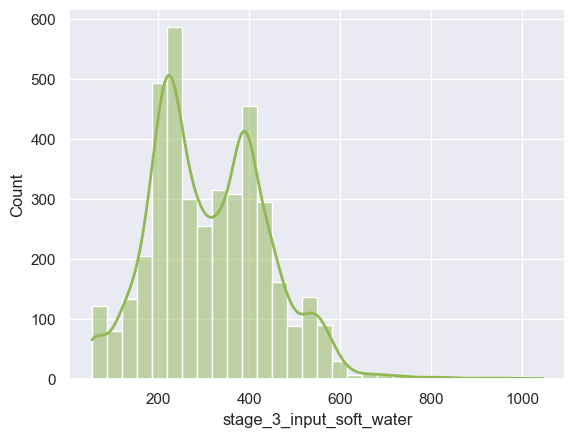

In [94]:
print(df['stage_3_input_soft_water'].mean())
print(df['stage_3_input_soft_water'].median())
sns.histplot(df['stage_3_input_soft_water'], kde=True, bins=30, color=color_for_histplot, line_kws=line)
plt.show()

In [95]:
df['stage_3_input_soft_water'] = df['stage_3_input_soft_water'].fillna(df['stage_3_input_soft_water'].median())

'stage_3_input_pressure' - подаваемое давление в агрегат, в кПа  
Распределение не нормальное - используем медиану

0.3400930899828234
0.34


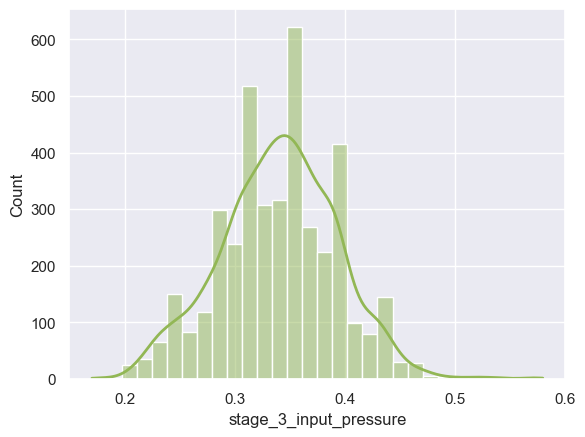

In [96]:
print(df['stage_3_input_pressure'].mean())
print(df['stage_3_input_pressure'].median())
sns.histplot(df['stage_3_input_pressure'], kde=True, bins=30, color=color_for_histplot, line_kws=line)
plt.show()

In [97]:
df['stage_3_input_pressure'] = df['stage_3_input_pressure'].fillna(df['stage_3_input_pressure'].median())

'stage_2_output_top_vacuum' - вакуум низа в агрегате, в кПа  
Распределение не нормальное - используем медиану

58.50744844015005
56.230000000000004


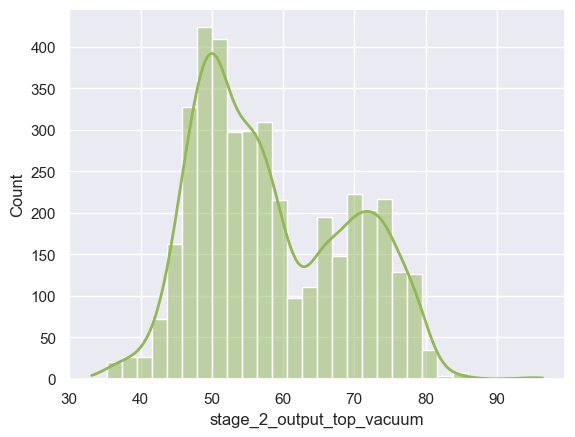

In [98]:
print(df['stage_2_output_top_vacuum'].mean())
print(df['stage_2_output_top_vacuum'].median())
sns.histplot(df['stage_2_output_top_vacuum'], kde=True, bins=30, color=color_for_histplot, line_kws=line)
plt.show()

In [99]:
df['stage_2_output_top_vacuum'] = df['stage_2_output_top_vacuum'].fillna(df['stage_2_output_top_vacuum'].median())

'stage_2_output_top_temp' - температура низа в агрегате, в градусах Цельсия  
Распределение не нормальное - используем медиану 

94.55052969208212
95.48


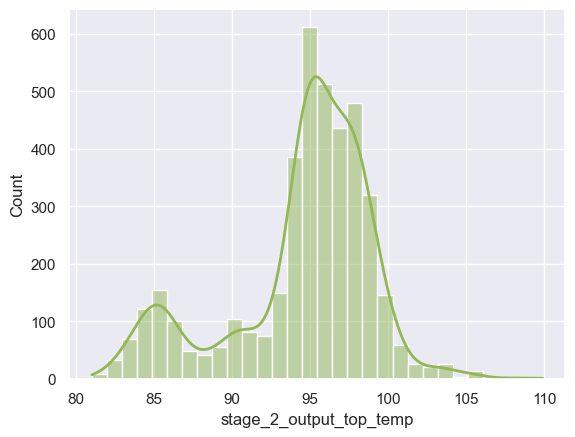

In [100]:
print(df['stage_2_output_top_temp'].mean())
print(df['stage_2_output_top_temp'].median())
sns.histplot(df['stage_2_output_top_temp'], kde=True, bins=30, color=color_for_histplot, line_kws=line)
plt.show()

In [101]:
df['stage_2_output_top_temp'] = df['stage_2_output_top_temp'].fillna(df['stage_2_output_top_temp'].median())

'stage_2_output_top_pressure_at_end' - давление верха в агрегате на выходе, в кПа  
Распределение почти нормальное - используем среднее 

261.41889310354594
260.49


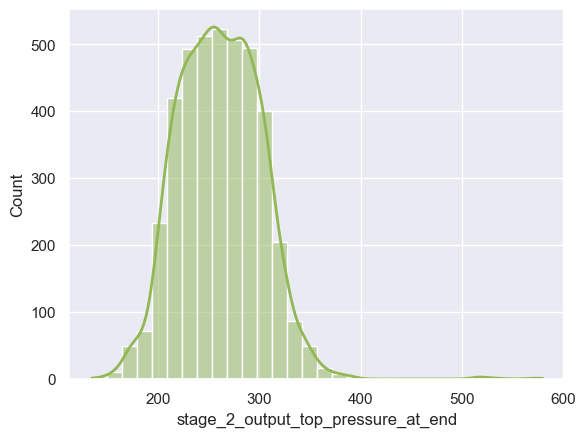

In [102]:
print(df['stage_2_output_top_pressure_at_end'].mean())
print(df['stage_2_output_top_pressure_at_end'].median())
sns.histplot(df['stage_2_output_top_pressure_at_end'], kde=True, bins=30, color=color_for_histplot, line_kws=line)
plt.show()

In [103]:
df['stage_2_output_top_pressure_at_end'] = df['stage_2_output_top_pressure_at_end'].fillna(df['stage_2_output_top_pressure_at_end'].mean())

'stage_2_output_top_pressure' - давление верха (top) в агрегате, в кПа  
Распределение не нормальное - используем медиану 

448.22973408610505
435.67999999999995


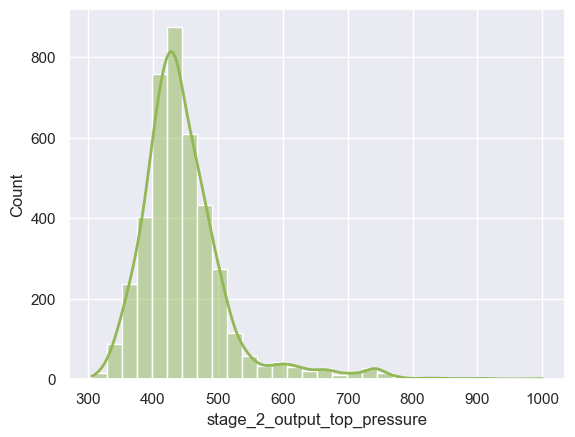

In [104]:

print(df['stage_2_output_top_pressure'].mean())
print(df['stage_2_output_top_pressure'].median())
sns.histplot(df['stage_2_output_top_pressure'], kde=True, bins=30, color=color_for_histplot, line_kws=line)
plt.show()

In [105]:
df['stage_2_output_top_pressure'] = df['stage_2_output_top_pressure'].fillna(df['stage_2_output_top_pressure'].median())

'stage_2_output_bottom_vacuum' - вакуум низа в агрегате, в кПа  
Распределение не нормальное - используем медиану 

56.660183852088494
56.085


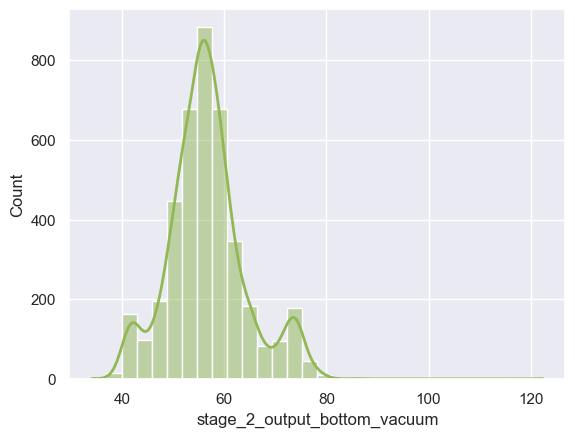

In [106]:

print(df['stage_2_output_bottom_vacuum'].mean())
print(df['stage_2_output_bottom_vacuum'].median())
sns.histplot(df['stage_2_output_bottom_vacuum'], kde=True, bins=30, color=color_for_histplot, line_kws=line)
plt.show()

In [107]:
df['stage_2_output_bottom_vacuum'] = df['stage_2_output_bottom_vacuum'].fillna(df['stage_2_output_bottom_vacuum'].median())

'stage_2_output_bottom_temp_hum_steam' - температура насыщенного пара низа в агрегате, в градусах Цельсия  
Распределение не нормальное - используем медиану 

98.36895446399478
96.96


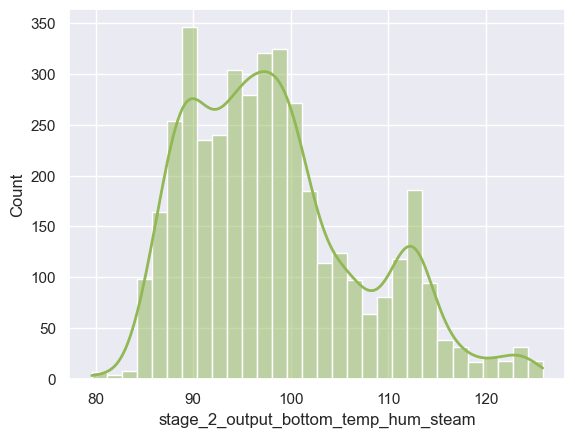

In [108]:
print(df['stage_2_output_bottom_temp_hum_steam'].mean())
print(df['stage_2_output_bottom_temp_hum_steam'].median())
sns.histplot(df['stage_2_output_bottom_temp_hum_steam'], kde=True, bins=30, color=color_for_histplot, line_kws=line)
plt.show()

In [109]:
df['stage_2_output_bottom_temp_hum_steam'] = df['stage_2_output_bottom_temp_hum_steam'].fillna(df['stage_2_output_bottom_temp_hum_steam'].median())

'stage_2_output_bottom_temp' - температура низа в агрегате, в градусах Цельсия  
Распределение нормальное - используем среднее

79.08883145711408
78.75


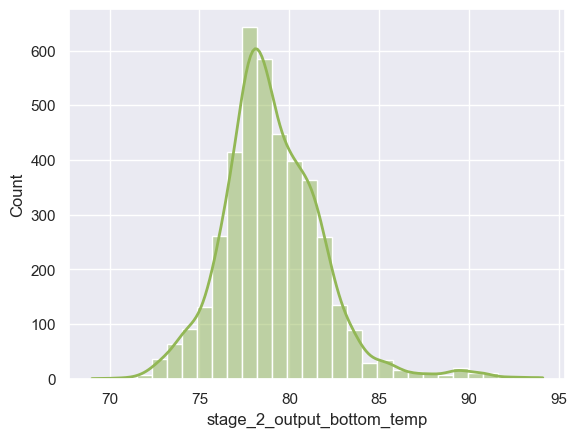

In [110]:
print(df['stage_2_output_bottom_temp'].mean())
print(df['stage_2_output_bottom_temp'].median())
sns.histplot(df['stage_2_output_bottom_temp'], kde=True, bins=30, color=color_for_histplot, line_kws=line)
plt.show()

In [111]:
df['stage_2_output_bottom_temp'] = df['stage_2_output_bottom_temp'].fillna(df['stage_2_output_bottom_temp'].mean())

'stage_2_output_bottom_pressure' - давление низа (bottom) в агрегате, в кПа  
Распределение не нормальное - используем медиану 

402.8349870849094
387.51


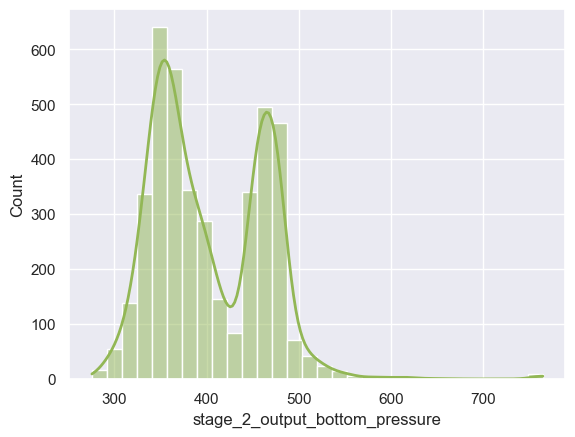

In [112]:
print(df['stage_2_output_bottom_pressure'].mean())
print(df['stage_2_output_bottom_pressure'].median())
sns.histplot(df['stage_2_output_bottom_pressure'], kde=True, bins=30, color=color_for_histplot, line_kws=line)
plt.show()

In [113]:
df['stage_2_output_bottom_pressure'] = df['stage_2_output_bottom_pressure'].fillna(df['stage_2_output_bottom_pressure'].median())

'stage_2_input_water_sum' - количество подаваемой суммарной воды в агрегат, в м3.  
Распределение не нормальное - используем медиану 

87.01535285768624
83.05000000000001


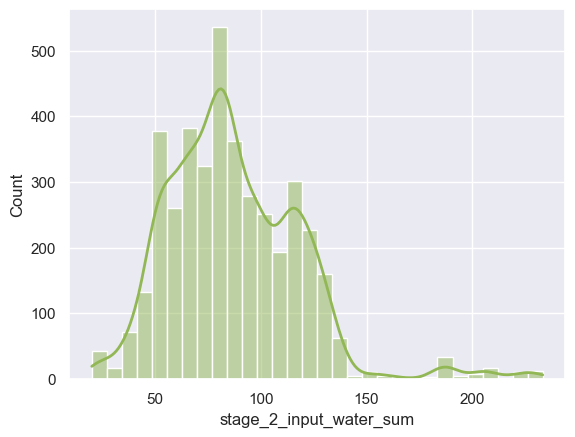

In [114]:
print(df['stage_2_input_water_sum'].mean())
print(df['stage_2_input_water_sum'].median())
sns.histplot(df['stage_2_input_water_sum'], kde=True, bins=30, color=color_for_histplot, line_kws=line)
plt.show()

In [115]:

df['stage_2_input_water_sum'] = df['stage_2_input_water_sum'].fillna(df['stage_2_input_water_sum'].median())

'stage_1_output_konv_avd' - процент конверсии сырья в мономер.  
Различия медианы и среднего мало, распределение выглядит почти нормальным, можно брать и среднее и медиану

69.62950321048876
70.13


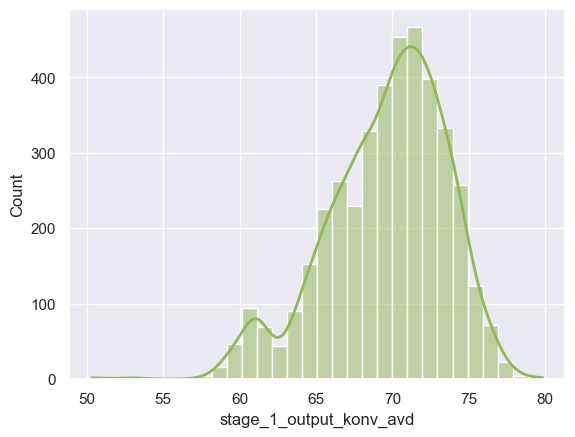

In [116]:
print(df['stage_1_output_konv_avd'].mean())
print(df['stage_1_output_konv_avd'].median())
sns.histplot(df['stage_1_output_konv_avd'], kde=True, bins=30, color=color_for_histplot, line_kws=line)
plt.show()

In [117]:
df['stage_1_output_konv_avd'] = df['stage_1_output_konv_avd'].fillna(df['stage_1_output_konv_avd'].mean())

## Проведение расчётов

### Категория опасности 

In [118]:
df['danger_gas_kat'] = df['stage_4_output_danger_gas'].apply(
    lambda x: None if pd.isna(x) else (1 if x < 0.05 else (2 if x < 0.16 else 3))
)

df.columns

Index(['stage_1_output_konv_avd', 'stage_2_input_water_sum',
       'stage_2_output_bottom_pressure', 'stage_2_output_bottom_temp',
       'stage_2_output_bottom_temp_hum_steam', 'stage_2_output_bottom_vacuum',
       'stage_2_output_top_pressure', 'stage_2_output_top_pressure_at_end',
       'stage_2_output_top_temp', 'stage_2_output_top_vacuum',
       'stage_3_input_pressure', 'stage_3_input_soft_water',
       'stage_3_input_steam', 'stage_3_output_temp_hum_steam',
       'stage_3_output_temp_top', 'stage_4_input_overheated_steam',
       'stage_4_input_polymer', 'stage_4_input_steam', 'stage_4_input_water',
       'stage_4_output_danger_gas', 'stage_4_output_dry_residue_avg',
       'stage_4_output_product', 'work_shift', 'danger_gas_kat'],
      dtype='object')

###  Cводная таблица изменения параметров сгруппированная по дням 

In [119]:
df['input_water_sum'] = df['stage_2_input_water_sum'] + df['stage_4_input_water'] + df['stage_3_input_soft_water']
df['input_steam_sum'] = df['stage_4_input_steam'] + df['stage_3_input_steam']

columns_to_sum = ['stage_4_input_overheated_steam', 'stage_4_input_polymer', 'input_water_sum', 'input_steam_sum']

pivot_df = df.groupby('datetime')[columns_to_sum].sum()

pressure_avg = df.groupby('datetime')['stage_3_input_pressure'].mean().reset_index()
pivot_df = pd.merge(pivot_df, pressure_avg, on='datetime', how='left')
df.drop(columns=['input_water_sum', 'input_steam_sum'], inplace=True, axis=1)
pivot_df

datetime  stage_4_input_overheated_steam  \
0    2021-01-28 18:00:00                          156.67   
1    2021-01-28 19:00:00                          156.76   
2    2021-01-28 20:00:00                          156.86   
3    2021-01-28 21:00:00                          156.41   
4    2021-01-28 22:00:00                          155.96   
...                  ...                             ...   
4087 2023-03-19 12:00:00                          152.90   
4088 2023-03-20 00:00:00                          152.53   
4089 2023-03-20 12:00:00                          152.53   
4090 2023-03-21 01:00:00                          151.80   
4091 2023-03-21 12:00:00                          153.01   

      stage_4_input_polymer  input_water_sum  input_steam_sum  \
0                     19.08           875.10           670.85   
1                     19.15           888.92           677.62   
2                     19.23           902.74           684.41   
3                     19.36           870.48           723.96   
4                     19.49           838.22           763.52   
...                     ...              ...              ...   
4087                  22.69           531.71           451.57   
4088                  21.38           552.58           532.57   
4089                  21.78           577.73           536.51   
4090                  22.44           656.78           508.40   
4091                  21.68           642.00           533.34   

      stage_3_input_pressure  
0                       0.35  
1                       0.35  
2                       0.35  
3                       0.35  
4                       0.35  
...                      ...  
4087                    0.46  
4088                    0.39  
4089                    0.33  
4090                    0.31  
4091                    0.40  

[4092 rows x 6 columns]

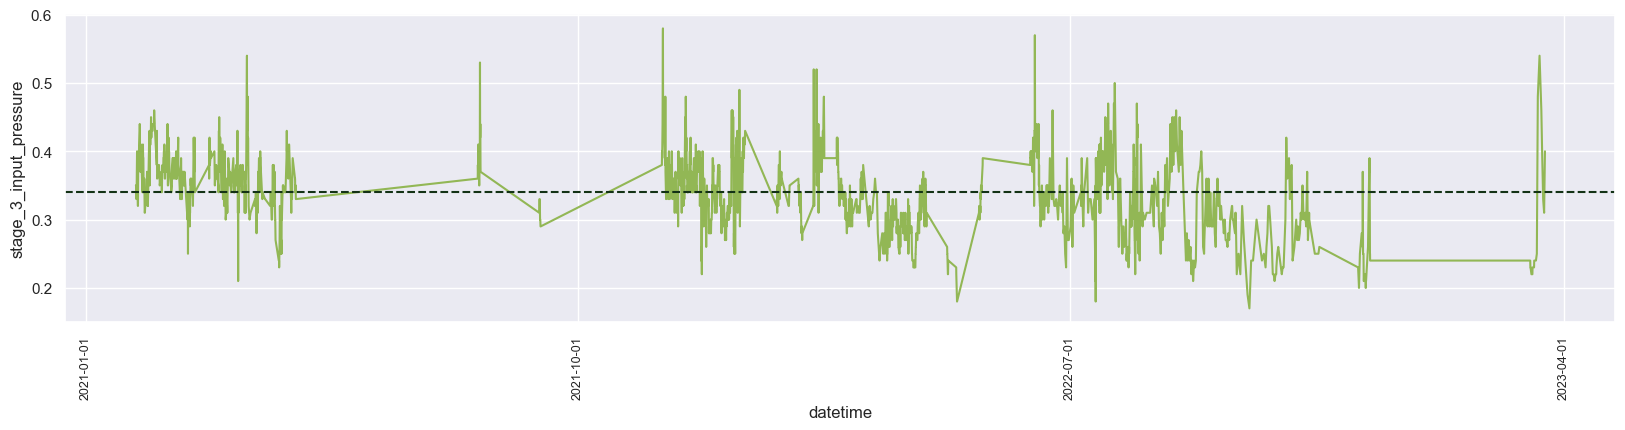

In [120]:
plt.figure(figsize=(20, 4))

graph = sns.lineplot(x='datetime', y='stage_3_input_pressure', data=pivot_df, color=color_for_histplot)
graph.set_xticks(graph.get_xticks()[::3]) 
plt.xticks(rotation=90)
plt.xticks(fontsize=9)
mean_value = pivot_df['stage_3_input_pressure'].mean()
plt.axhline(mean_value, color=color_for_line, linestyle='--', label=f'Среднее: {mean_value:.2f}')
plt.show()

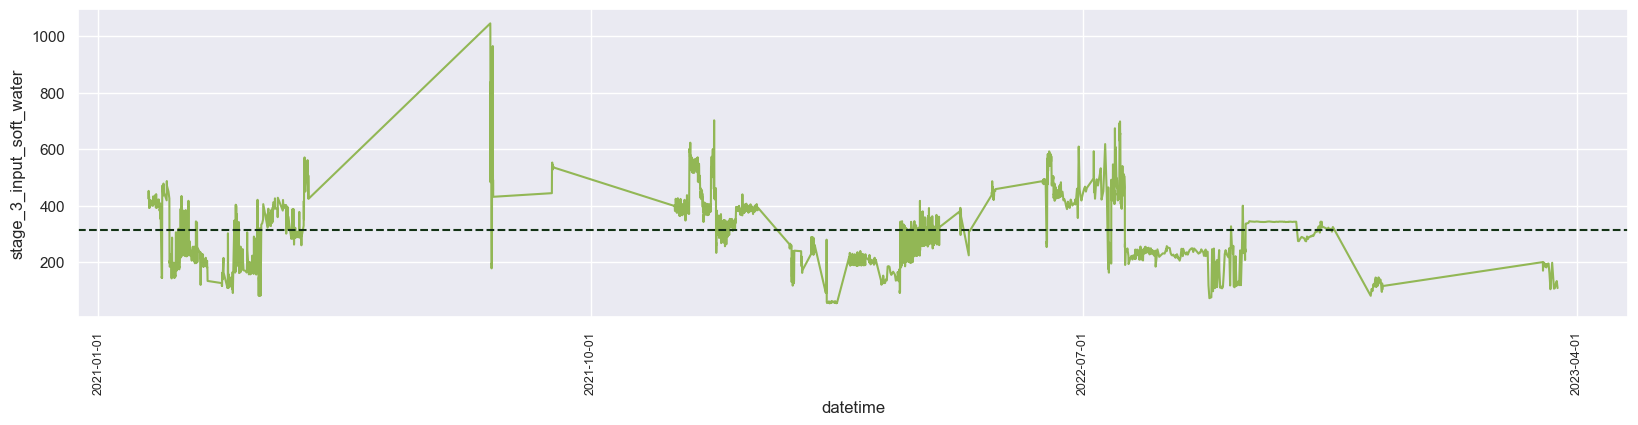

In [121]:
plt.figure(figsize=(20, 4))

graph = sns.lineplot(x='datetime', y='stage_3_input_soft_water', data=df, color=color_for_histplot)
graph.set_xticks(graph.get_xticks()[::3]) 
plt.xticks(rotation=90)
plt.xticks(fontsize=9)
mean_value = df['stage_3_input_soft_water'].mean()
plt.axhline(mean_value, color=color_for_line, linestyle='--', label=f'Среднее: {mean_value:.2f}')
plt.show()

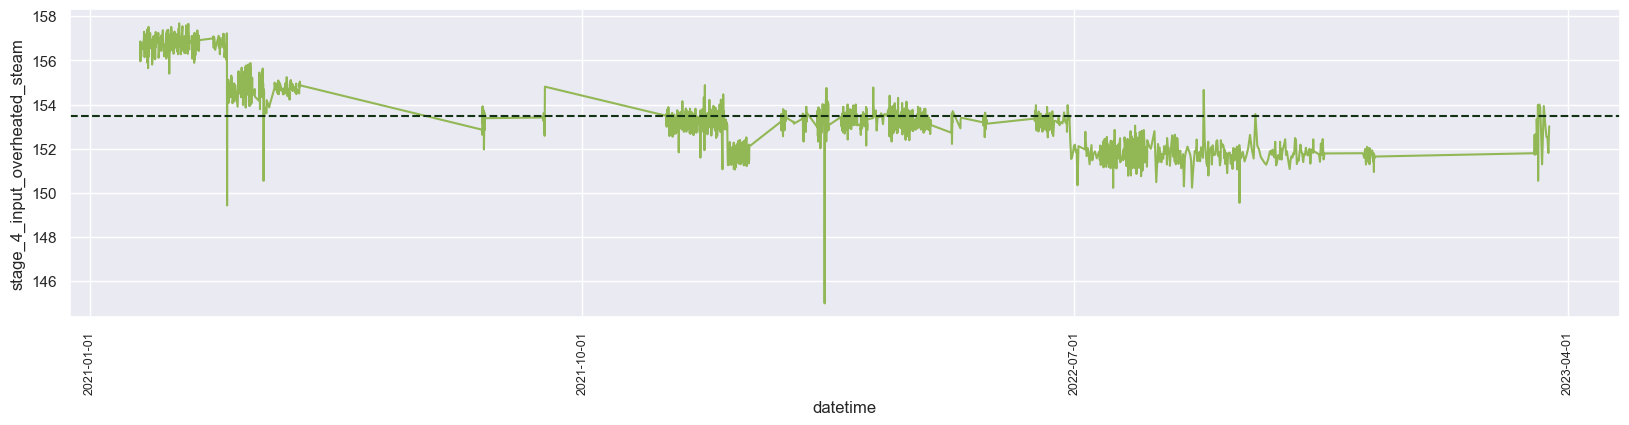

In [122]:
plt.figure(figsize=(20, 4))

graph = sns.lineplot(x='datetime', y='stage_4_input_overheated_steam', data=pivot_df, color=color_for_histplot)
graph.set_xticks(graph.get_xticks()[::3]) 
plt.xticks(rotation=90)
plt.xticks(fontsize=9)
mean_value = pivot_df['stage_4_input_overheated_steam'].mean()
plt.axhline(mean_value, color=color_for_line, linestyle='--', label=f'Среднее: {mean_value:.2f}')
plt.show()

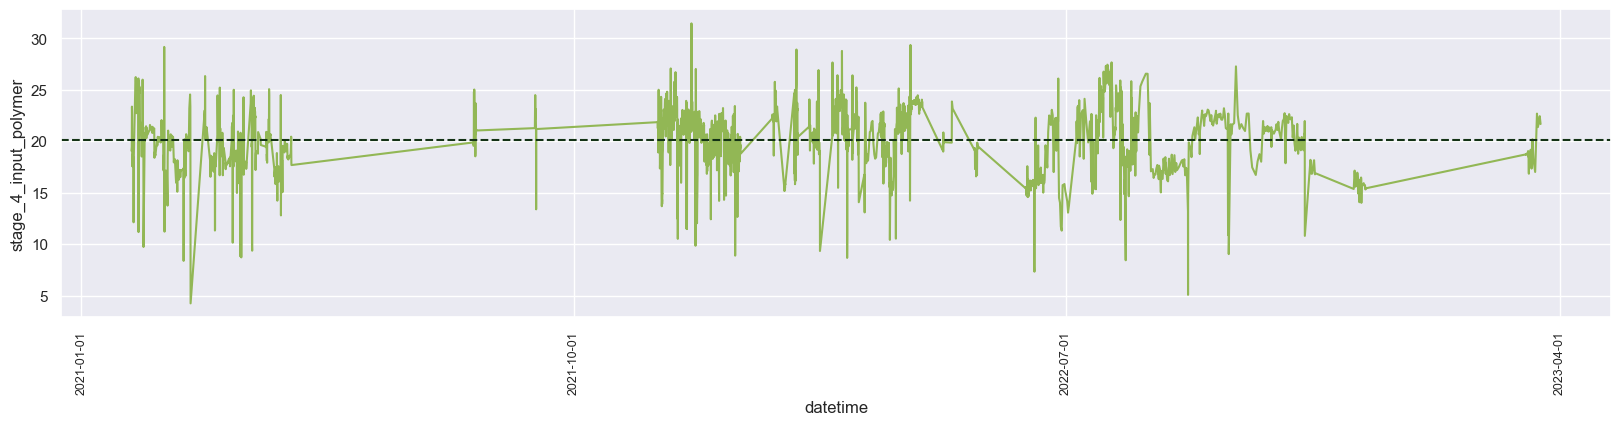

In [123]:
plt.figure(figsize=(20, 4))

graph = sns.lineplot(x='datetime', y='stage_4_input_polymer', data=pivot_df, color=color_for_histplot)
graph.set_xticks(graph.get_xticks()[::3]) 
plt.xticks(rotation=90)
plt.xticks(fontsize=9)
mean_value = pivot_df['stage_4_input_polymer'].mean()
plt.axhline(mean_value, color=color_for_line, linestyle='--', label=f'Среднее: {mean_value:.2f}')
plt.show()

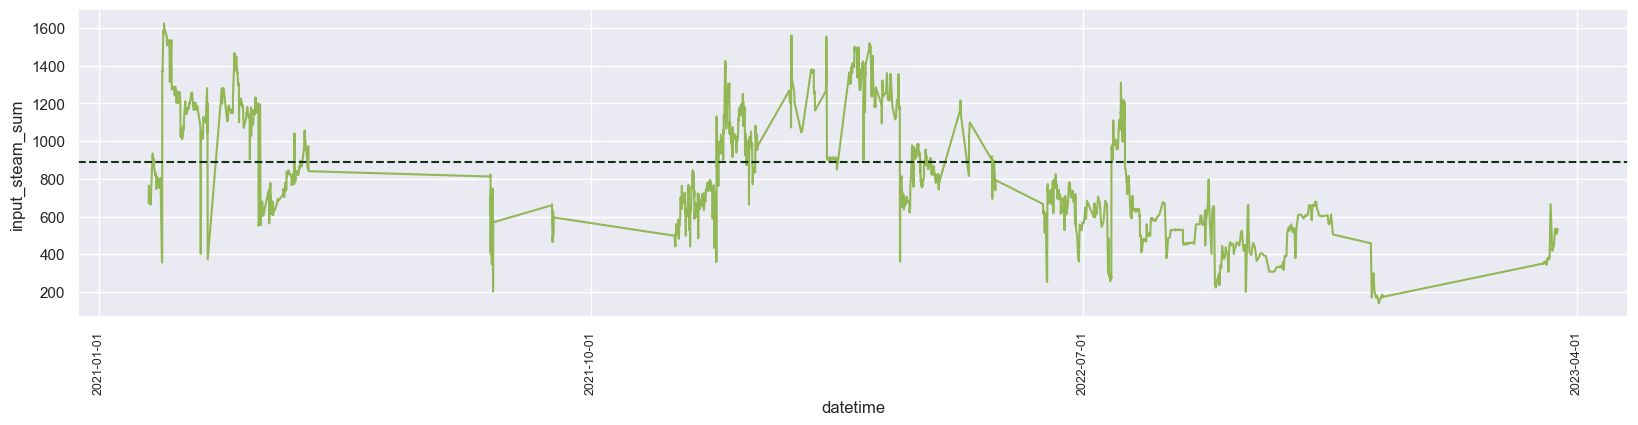

In [124]:
plt.figure(figsize=(20, 4))

graph = sns.lineplot(x='datetime', y='input_steam_sum', data=pivot_df, color=color_for_histplot)
graph.set_xticks(graph.get_xticks()[::3]) 
plt.xticks(rotation=90)
plt.xticks(fontsize=9)
mean_value = pivot_df['input_steam_sum'].mean()
plt.axhline(mean_value, color=color_for_line, linestyle='--', label=f'Среднее: {mean_value:.2f}')
plt.show()

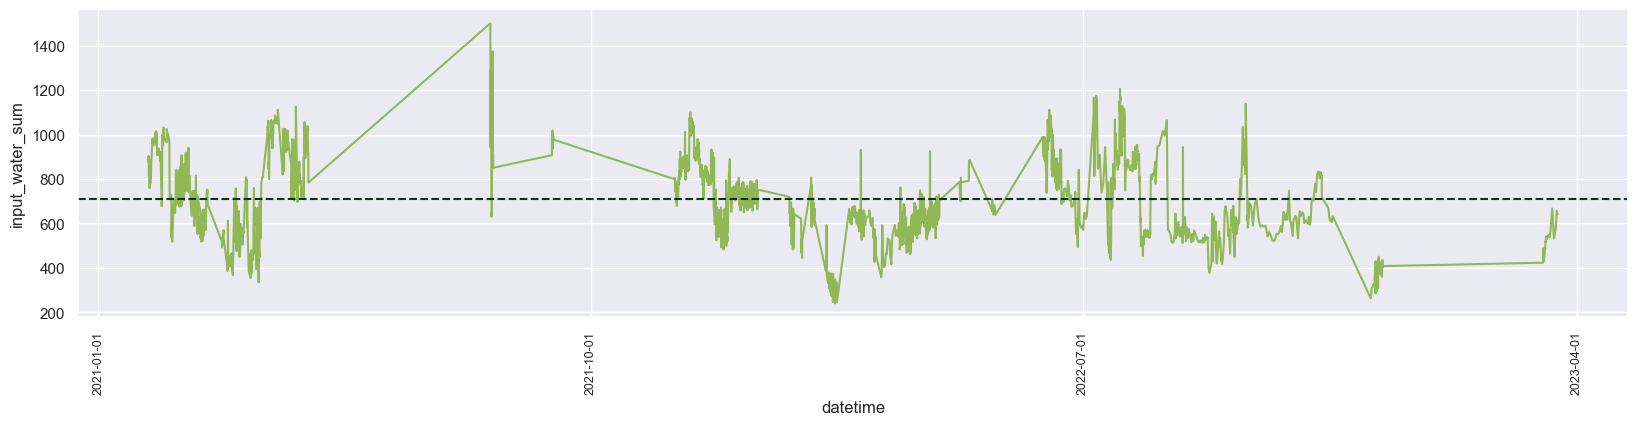

In [125]:
plt.figure(figsize=(20, 4))

graph = sns.lineplot(x='datetime', y='input_water_sum', data=pivot_df, color=color_for_histplot)
graph.set_xticks(graph.get_xticks()[::3])

plt.xticks(rotation=90)
plt.xticks(fontsize=9)
mean_value = pivot_df['input_water_sum'].mean()
plt.axhline(mean_value, color=color_for_line, linestyle='--', label=f'Среднее: {mean_value:.2f}')
plt.show()

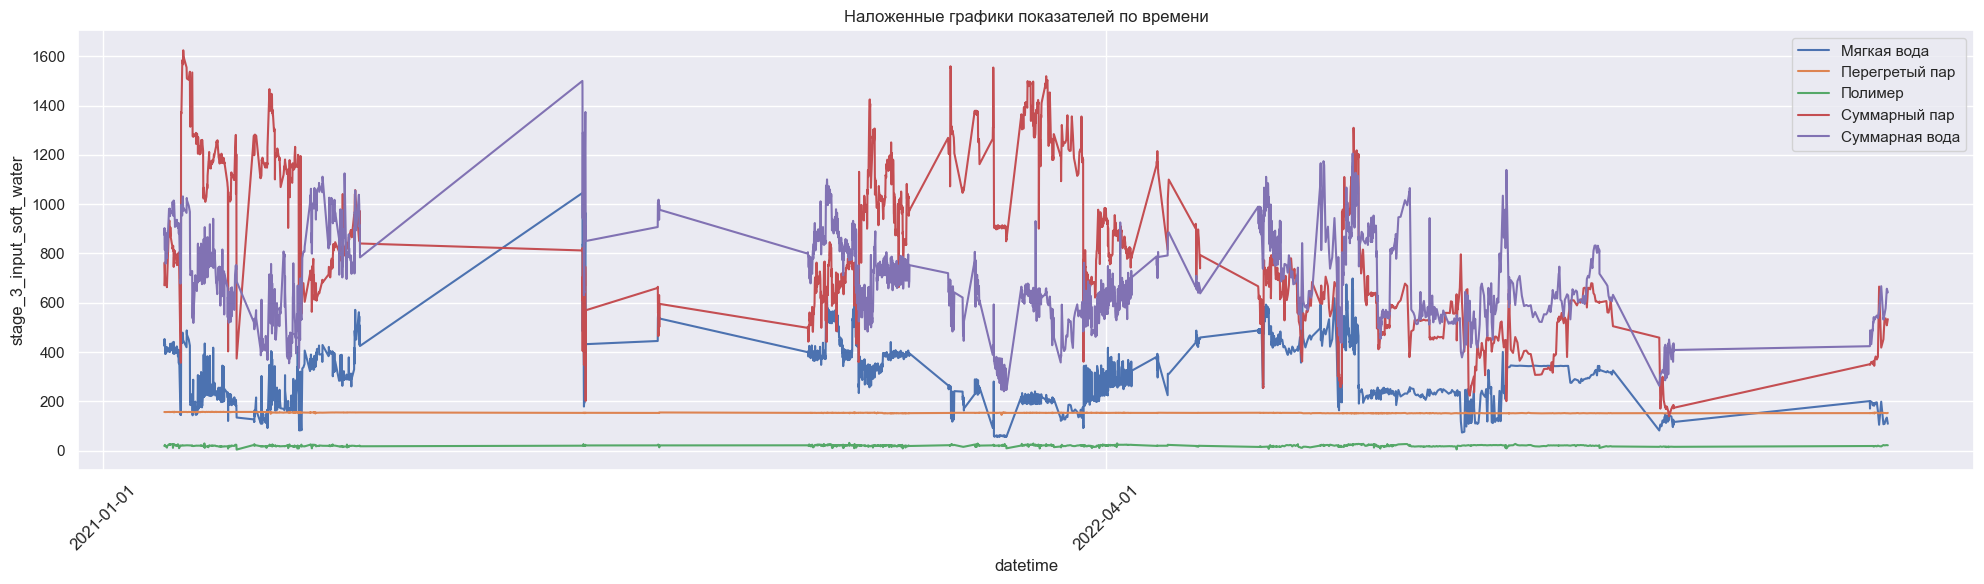

In [126]:
fig, ax = plt.subplots(figsize=(20, 6))

sns.lineplot(x='datetime', y='stage_3_input_soft_water', data=df, label='Мягкая вода', ax=ax)
sns.lineplot(x='datetime', y='stage_4_input_overheated_steam', data=pivot_df, label='Перегретый пар', ax=ax)
sns.lineplot(x='datetime', y='stage_4_input_polymer', data=pivot_df, label='Полимер', ax=ax)
sns.lineplot(x='datetime', y='input_steam_sum', data=pivot_df, label='Суммарный пар', ax=ax)
sns.lineplot(x='datetime', y='input_water_sum', data=pivot_df, label='Суммарная вода', ax=ax)

ax.set_xticks(ax.get_xticks()[::5])
plt.xticks(rotation=45, fontsize=12)

plt.legend()
plt.title('Наложенные графики показателей по времени')
plt.tight_layout()
plt.show()



Дневной расход ресурсов колеблеца постоянно, что говорит о нестбильности производства.  
К концу 2022 года (август) колебания умельнишились, что говорит о стабилизации процесса  
  
В среднем компания тратила больше ресурсов (продолжительном периоде) с 2021.08 до 2022.01  
Так же тратилось много (но меньше) ресурсов в период с 2022.03 до 2022.06

### Cводная таблица изменения категории опасности сгруппированная по месяцам

Обработаем даты

In [127]:
df['datetime'] = df['datetime'].apply(lambda x: x[:-3])

KeyError: 'datetime'

In [ ]:
for_table_df = df[['datetime', 'danger_gas_kat']]

for_table_df = for_table_df.groupby(['datetime'], as_index=False).value_counts()
pivot_table = for_table_df.pivot_table(index='datetime', aggfunc=mode)
pivot_table['danger_gas_kat'] = pivot_table['danger_gas_kat'].astype('int')
pivot_table

count  danger_gas_kat
datetime                       
2021-01       5               2
2021-02      50               2
2021-03      59               2
2021-04      33               2
2021-08       8               2
2021-09       3               2
2021-11      32               2
2021-12      54               3
2022-01      11               3
2022-02      36               2
2022-03      40               2
2022-04      38               2
2022-05       4               2
2022-06      46               2
2022-07      52               2
2022-08      32               2
2022-09      47               2
2022-10      29               2
2022-11      16               2
2022-12       8               2
2023-03      10               3

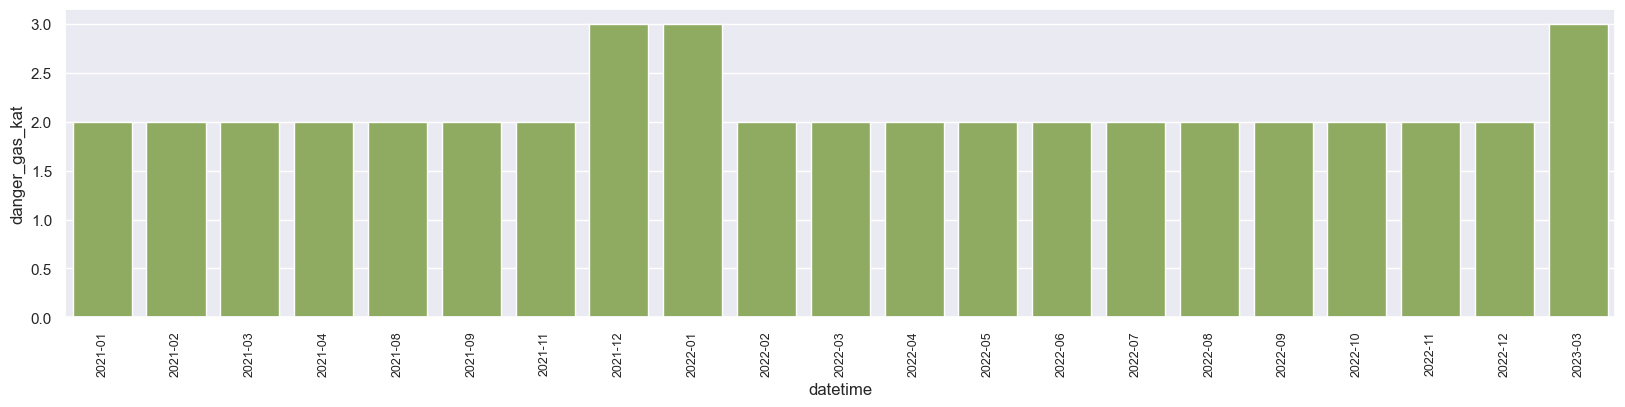

In [ ]:
plt.figure(figsize=(20, 4))

graph = sns.barplot(x='datetime', y='danger_gas_kat', data=pivot_table, color=color_for_histplot)

plt.xticks(rotation=90)
plt.xticks(fontsize=9)
plt.show()

Наибольшая опасность была в период с 2021.12 - 2022.01 и 2023.03

### Среднее значение каждого параметра для каждой категории

In [ ]:
curr_df = df.copy()

curr_df.drop(['datetime', 'work_shift'], axis=1, inplace=True)

group = curr_df.groupby(['danger_gas_kat']).mean()
group

stage_1_output_konv_avd  stage_2_input_water_sum  \
danger_gas_kat                                                     
1.0                           65.830000                80.640000   
2.0                           68.953028                87.749786   
3.0                           69.334363                86.440125   

                stage_2_output_bottom_pressure  stage_2_output_bottom_temp  \
danger_gas_kat                                                               
1.0                                 383.996000                   78.536000   
2.0                                 394.797500                   79.060543   
3.0                                 395.551589                   78.734642   

                stage_2_output_bottom_temp_hum_steam  \
danger_gas_kat                                         
1.0                                       101.944000   
2.0                                        98.293372   
3.0                                        97.468785   

                stage_2_output_bottom_vacuum  stage_2_output_top_pressure  \
danger_gas_kat                                                              
1.0                                56.360000                   450.904000   
2.0                                56.631069                   458.169663   
3.0                                56.707913                   443.590763   

                stage_2_output_top_pressure_at_end  stage_2_output_top_temp  \
danger_gas_kat                                                                
1.0                                     266.380000                93.890000   
2.0                                     262.249986                94.345921   
3.0                                     263.886760                94.927040   

                stage_2_output_top_vacuum  ...  stage_3_input_steam  \
danger_gas_kat                             ...                        
1.0                             58.212000  ...           756.620000   
2.0                             59.373322  ...           815.834671   
3.0                             56.921651  ...           837.982150   

                stage_3_output_temp_hum_steam  stage_3_output_temp_top  \
danger_gas_kat                                                           
1.0                                109.586000                41.268000   
2.0                                109.372763                42.216957   
3.0                                109.970218                42.493520   

                stage_4_input_overheated_steam  stage_4_input_polymer  \
danger_gas_kat                                                          
1.0                                 153.314000              18.092000   
2.0                                 153.348470              20.078684   
3.0                                 153.236044              20.155358   

                stage_4_input_steam  stage_4_input_water  \
danger_gas_kat                                             
1.0                        4.612000           232.050000   
2.0                        5.221941           297.209391   
3.0                        5.592835           312.433240   

                stage_4_output_danger_gas  stage_4_output_dry_residue_avg  \
danger_gas_kat                                                              
1.0                              0.036000                       21.800000   
2.0                              0.119079                       22.222434   
3.0                              0.181651                       22.525171   

                stage_4_output_product  
danger_gas_kat                          
1.0                          43.484000  
2.0                          44.234852  
3.0                          42.330779  

[3 rows x 22 columns]

### Корреляционный анализ

<Axes: >

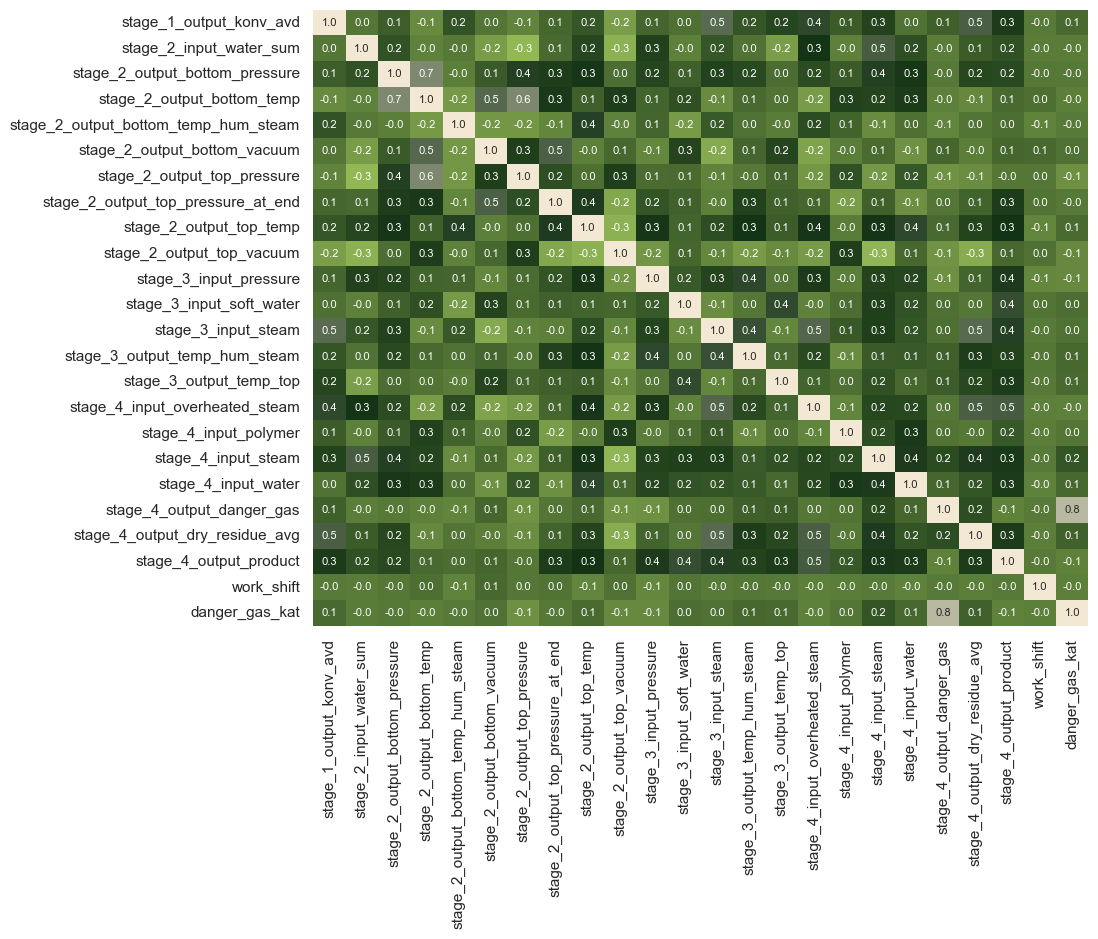

In [ ]:
df_filtered = df.dropna(subset=['stage_4_output_danger_gas'])
custom_gradient = LinearSegmentedColormap.from_list("CorporateGradient", corporate_colors)
spec_df = df_filtered.drop('datetime', axis=1)
correlation_matrix = spec_df.corr(method='spearman')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap=custom_gradient, fmt='.1f', cbar=False, annot=True, annot_kws={"size": 8})


## Проверка гипотез

Функция для проверки нормольности распределения данных

In [ ]:
def raspder(x):
    koalit = []
    for i in x.columns:
        _, res = shapiro(x[i])
        if res >= 0.05:
            koalit.append([i, 'нормальное'])
        else:
            koalit.append([i, 'ненормальное'])
    return pd.DataFrame(koalit, columns=['Параметр', 'Распределение'])

### Гипотеза 1. Если ли различия в доле опасного газа от смены?

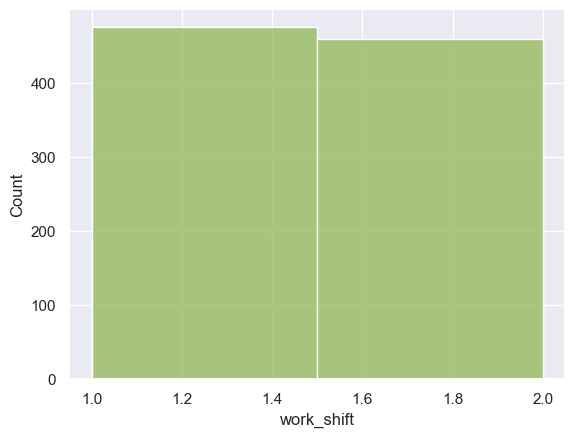

<Axes: xlabel='stage_4_output_danger_gas', ylabel='Count'>

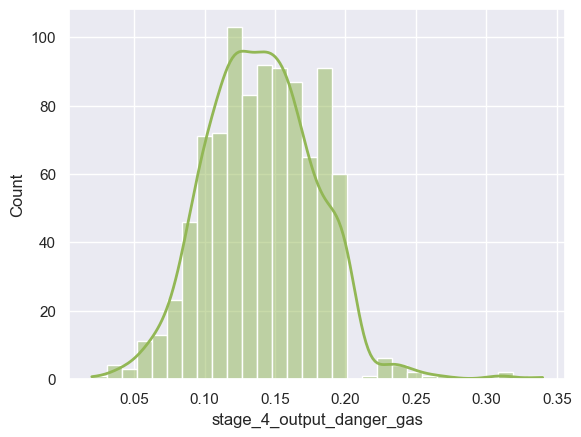

In [ ]:
cor_df = df[['work_shift', 'stage_4_output_danger_gas']].copy()
cor_df = cor_df.dropna(subset=['stage_4_output_danger_gas']).reset_index(drop=True)
cor_df['work_shift'] = cor_df['work_shift'].astype(int)

sns.histplot(cor_df['work_shift'], bins=2, color=color_for_histplot, line_kws=line)
plt.show()
sns.histplot(cor_df['stage_4_output_danger_gas'], kde=True, bins=30, color=color_for_histplot, line_kws=line)

In [ ]:
raspder(cor_df)

Параметр Распределение
0                 work_shift  ненормальное
1  stage_4_output_danger_gas  ненормальное

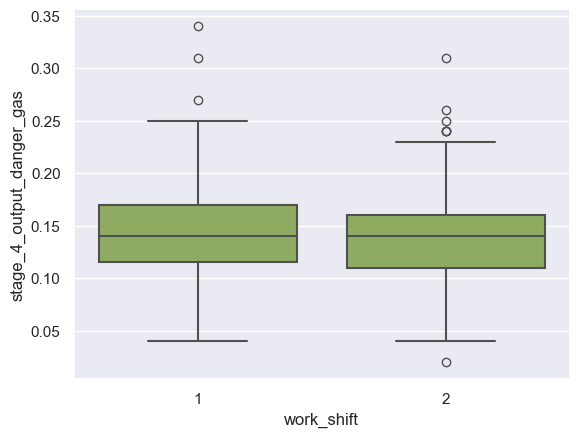

Коэффициент корреляции: -0.0158
P-уровень: 0.6302


In [ ]:
sns.boxplot(x='work_shift', y='stage_4_output_danger_gas', data=cor_df, color=color_for_histplot, linewidth=1.5)
plt.show()
corr, p_value = pointbiserialr(cor_df['work_shift'], cor_df['stage_4_output_danger_gas']) # разновидность корреляции Пирсона
print(f"Коэффициент корреляции: {corr:.4f}")
print(f"P-уровень: {p_value:.4f}")


Значение очень близко к 0, что говорит об отсутствии линейной связи  
  
H₀ = Между  и stage_4_output_danger_gas нет линейной связи  
H₁ = Между work_shift и stage_4_output_danger_gas существует линейная связь  

P-уровень: 0.6302 > 0.05, нет оснований отвергнуть нулевую гипотезу в пользу альтернативной.

### Гипотеза 2. Какая из смен лучше управляет температурой верха на этапе 3?

In [ ]:
cor_df = df[['work_shift', 'stage_3_output_temp_top']].copy()
df['work_shift'] = cor_df['work_shift'].astype(int)

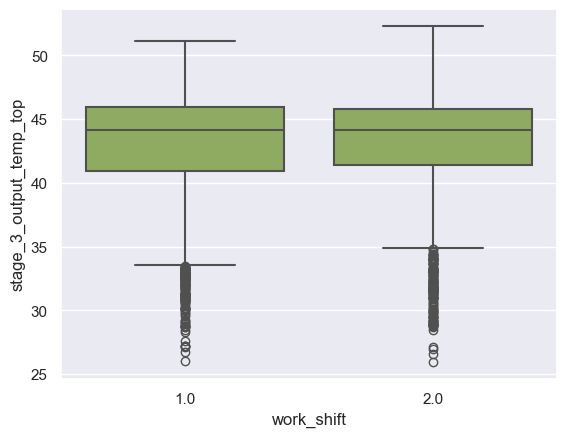

<Axes: xlabel='stage_3_output_temp_top', ylabel='Count'>

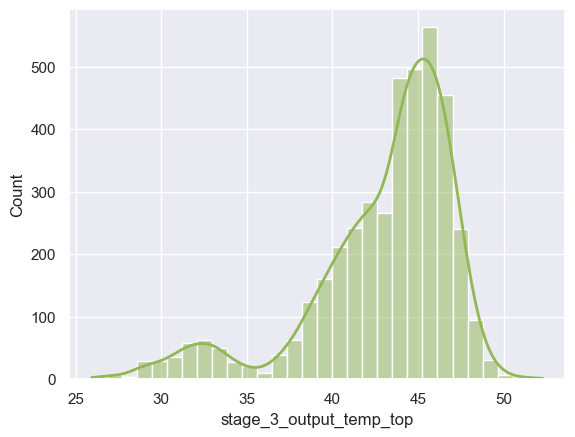

In [ ]:
sns.boxplot(x='work_shift', y='stage_3_output_temp_top', data=cor_df, color=color_for_histplot, linewidth=1.5)
plt.show()
sns.histplot(cor_df['stage_3_output_temp_top'], kde=True, bins=30, color=color_for_histplot, line_kws=line)

In [ ]:
raspder(cor_df)

Параметр Распределение
0               work_shift  ненормальное
1  stage_3_output_temp_top  ненормальное

H₀ = Нет различий в температуре верха между сменами.  
H₁ = Температура верха отличается между сменами.  

In [ ]:
cor, p_value = spearmanr(cor_df['work_shift'], cor_df['stage_3_output_temp_top'])
print(f"Корреляция: {cor}")
print(f"P-значение: {p_value}")

Корреляция: -0.0012083995438377083
P-значение: 0.938403815256692


P-уровень: 0.9384 > 0.05, нет оснований отвергнуть нулевую гипотезу в пользу альтернативной.

### Гипотеза 3. Конверсия мономера на 1 этапе влияет на количество подаваемой суммарной воды.

In [ ]:
gip_3 = df[['stage_1_output_konv_avd', 'stage_2_input_water_sum' ]]
gip_3

stage_1_output_konv_avd  stage_2_input_water_sum
0                       67.83                    92.99
1                       67.83                    91.82
2                       67.83                    90.65
3                       67.93                    90.24
4                       68.03                    89.84
...                       ...                      ...
4395                    67.33                    43.32
4396                    68.83                    62.24
4397                    66.83                    61.92
4398                    70.03                    62.80
4399                    66.83                    50.97

[4092 rows x 2 columns]

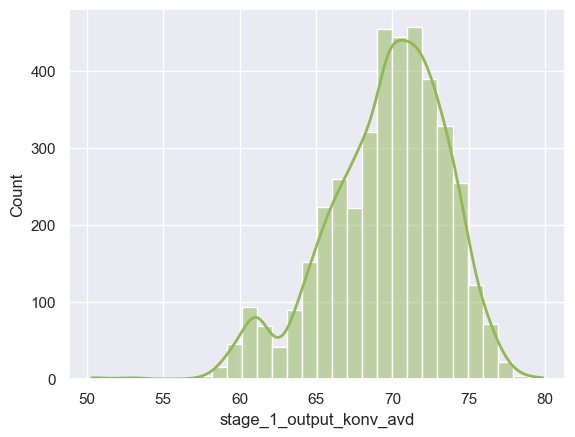

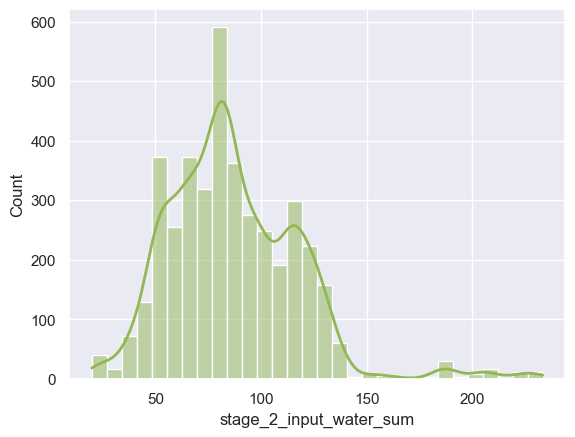

In [ ]:
sns.histplot(gip_3['stage_1_output_konv_avd'], kde=True, bins=30, color=color_for_histplot, line_kws=line)
plt.show()
sns.histplot(gip_3['stage_2_input_water_sum'], kde=True, bins=30, color=color_for_histplot, line_kws=line)
plt.show()

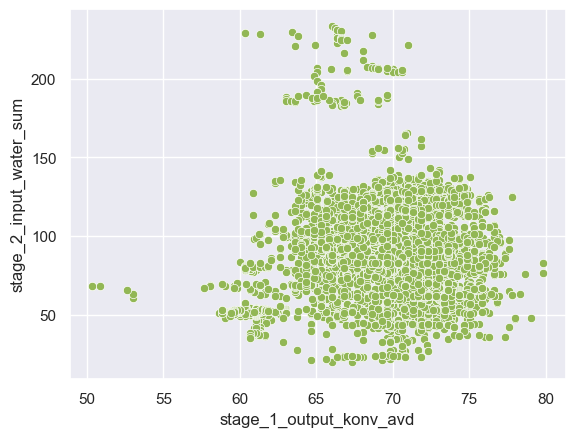

In [ ]:
sns.scatterplot(x='stage_1_output_konv_avd', y='stage_2_input_water_sum', data=gip_3, color=color_for_histplot)
plt.show()

In [ ]:
raspder(gip_3)

Параметр Распределение
0  stage_1_output_konv_avd  ненормальное
1  stage_2_input_water_sum  ненормальное

H₀ = Между stage_1_output_konv_avd и stage_2_input_water_sum нет линейной связи  
H₁ = Между stage_1_output_konv_avd и stage_2_input_water_sum существует линейная связь  

In [ ]:
cor, p_value = spearmanr(gip_3['stage_1_output_konv_avd'], gip_3['stage_2_input_water_sum'])
cor, p_value

(0.0005505235723273683, 0.9719158414582013)

P-уровень: 0.97191 > 0.05, нет оснований отвергнуть нулевую гипотезу в пользу альтернативной.

### Гипотеза 4. Количество выходного количества продукта связано с долей опасного газа

In [ ]:
gip_4 = df[['stage_4_output_product', 'stage_4_output_danger_gas']]
gip_4 = gip_4.dropna(subset=['stage_4_output_danger_gas']).reset_index(drop=True)
gip_4

stage_4_output_product  stage_4_output_danger_gas
0                     46.01                       0.16
1                     52.55                       0.15
2                     42.99                       0.13
3                     43.67                       0.14
4                     47.43                       0.15
..                      ...                        ...
929                    9.17                       0.20
930                   10.79                       0.14
931                    9.27                       0.20
932                   10.11                       0.18
933                    9.59                       0.20

[934 rows x 2 columns]

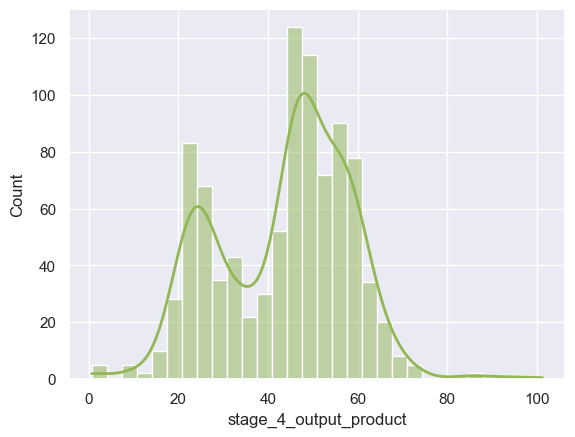

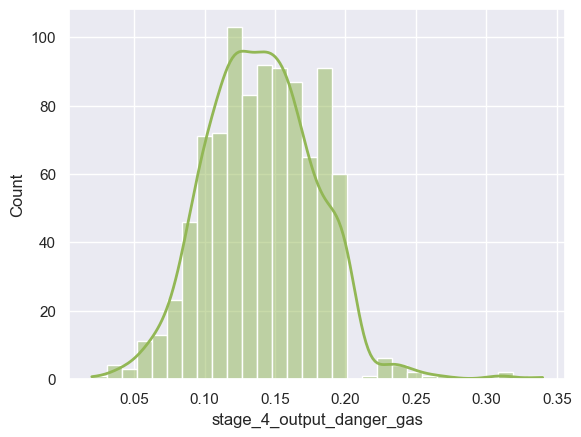

In [ ]:
sns.histplot(gip_4['stage_4_output_product'], kde=True, bins=30, color=color_for_histplot, line_kws=line)
plt.show()
sns.histplot(gip_4['stage_4_output_danger_gas'], kde=True, bins=30, color=color_for_histplot, line_kws=line)
plt.show()

In [ ]:
raspder(gip_4)

Параметр Распределение
0     stage_4_output_product  ненормальное
1  stage_4_output_danger_gas  ненормальное

H₀ = Между stage_4_output_product и stage_4_output_danger_gas нет линейной связи  
H₁ = Между stage_4_output_product и stage_4_output_danger_gas существует линейная связь  

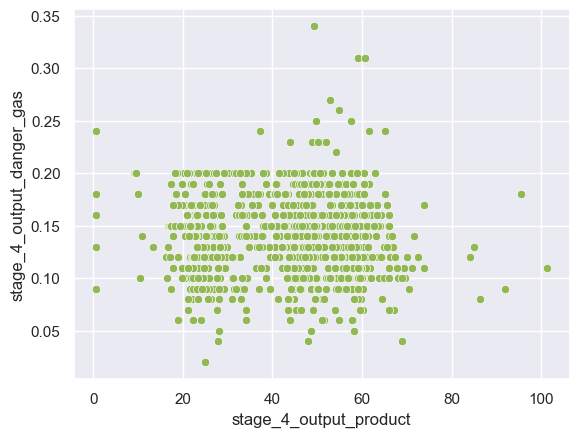

In [ ]:
sns.scatterplot(x='stage_4_output_product', y='stage_4_output_danger_gas', data=gip_4, color=color_for_histplot)
plt.show()

In [ ]:
cor, p_value = spearmanr(gip_4['stage_4_output_product'], gip_4['stage_4_output_danger_gas'])
cor, p_value

(-0.05170761277372991, 0.1142906451173194)

P-уровень: 0.1142 > 0.05, нет оснований отвергнуть нулевую гипотезу в пользу альтернативной.

### Гипотеза 5 Количество выходного продукта связано с количеством перегретого пара.

In [ ]:
gip_5 = df[['stage_4_output_product', 'stage_4_input_overheated_steam']]
gip_5

stage_4_output_product  stage_4_input_overheated_steam
0                      47.03                          156.67
1                      45.05                          156.76
2                      43.06                          156.86
3                      46.01                          156.41
4                      48.95                          155.96
...                      ...                             ...
4395                    9.17                          152.90
4396                   10.79                          152.53
4397                    9.27                          152.53
4398                   10.11                          151.80
4399                    9.59                          153.01

[4092 rows x 2 columns]

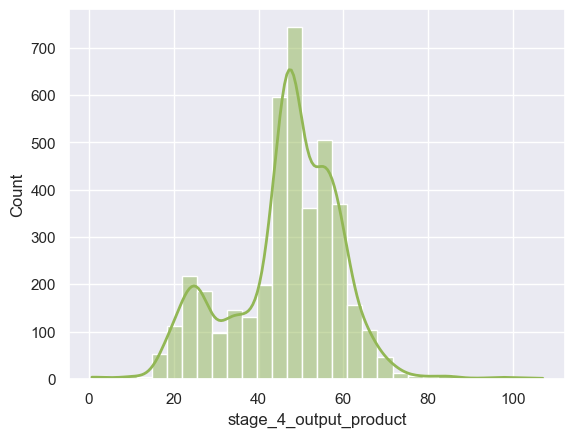

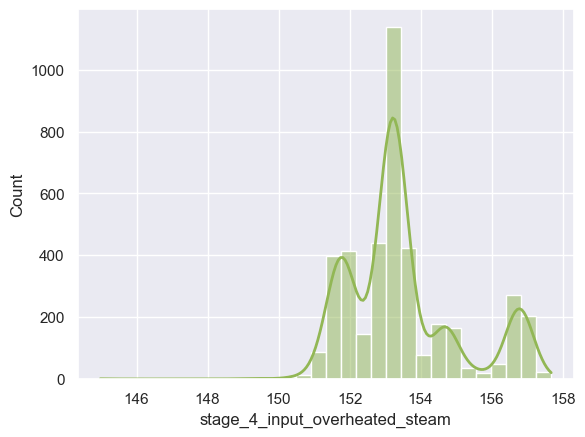

In [ ]:
sns.histplot(gip_5['stage_4_output_product'], kde=True, bins=30, color=color_for_histplot, line_kws=line)
plt.show()
sns.histplot(gip_5['stage_4_input_overheated_steam'], kde=True, bins=30, color=color_for_histplot, line_kws=line)
plt.show()

In [ ]:
raspder(gip_5)

Параметр Распределение
0          stage_4_output_product  ненормальное
1  stage_4_input_overheated_steam  ненормальное

H₀ = Между stage_4_output_product и stage_4_input_overheated_steam нет линейной связи  
H₁ = Между stage_4_output_product и stage_4_input_overheated_steam существует линейная связь

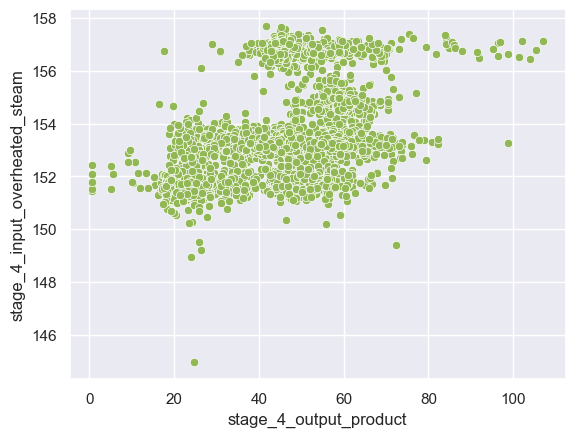

In [ ]:
sns.scatterplot(x='stage_4_output_product', y='stage_4_input_overheated_steam', data=gip_5, color=color_for_histplot)
plt.show()

In [ ]:
cor, p_value = spearmanr(gip_5['stage_4_output_product'], gip_5['stage_4_input_overheated_steam'])
cor, p_value

(0.3477500275281513, 1.2075581537758727e-116)

P-уровень: 1.2075581537758727e-116 > 0.05, отклоняем нулевую гипотезу и принимаем альтернативную гипотезу, поскольку результаты статистического теста показывают, что связь является статистически значимой.

### Гипотеза 6 Процент сухого остатка финального продукта связан с процентом конверсии сырья в мономер.

In [ ]:
gip_6 = df[['stage_4_output_dry_residue_avg', 'stage_1_output_konv_avd']]
gip_6

stage_4_output_dry_residue_avg  stage_1_output_konv_avd
0                              21.48                    67.83
1                              21.48                    67.83
2                              21.48                    67.83
3                              21.48                    67.93
4                              21.48                    68.03
...                              ...                      ...
4395                           21.18                    67.33
4396                           21.08                    68.83
4397                           21.08                    66.83
4398                           22.38                    70.03
4399                           22.18                    66.83

[4092 rows x 2 columns]

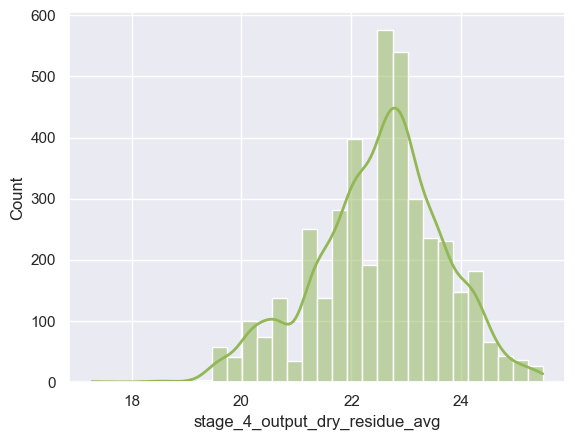

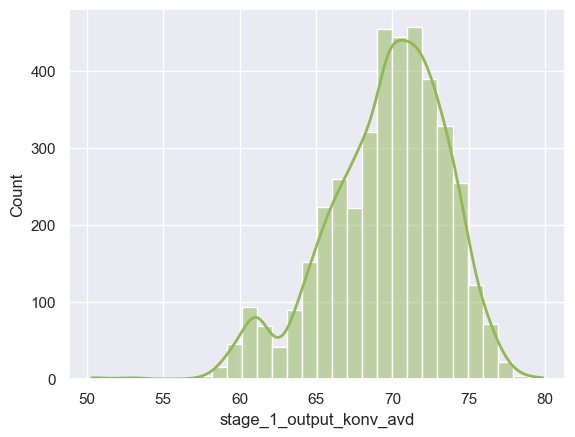

In [ ]:
sns.histplot(gip_6['stage_4_output_dry_residue_avg'], kde=True, bins=30, color=color_for_histplot, line_kws=line)
plt.show()
sns.histplot(gip_6['stage_1_output_konv_avd'], kde=True, bins=30, color=color_for_histplot, line_kws=line)
plt.show()

In [ ]:
raspder(gip_6)

Параметр Распределение
0  stage_4_output_dry_residue_avg  ненормальное
1         stage_1_output_konv_avd  ненормальное

H₀ = Между stage_4_output_dry_residue_avg и stage_1_output_konv_avd нет линейной связи  
H₁ = Между stage_4_output_dry_residue_avg и stage_1_output_konv_avd существует линейная связь

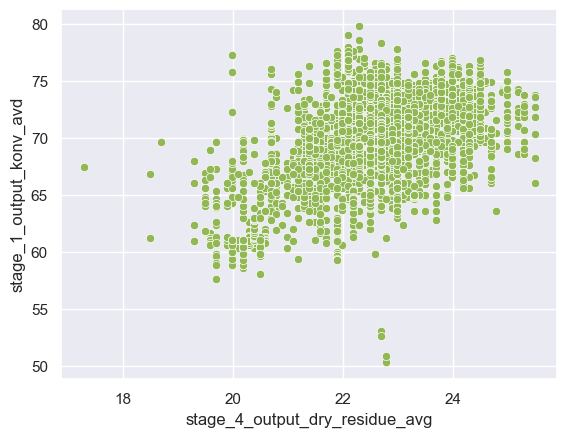

In [ ]:
sns.scatterplot(x='stage_4_output_dry_residue_avg', y='stage_1_output_konv_avd', data=gip_6, color=color_for_histplot)
plt.show()

In [ ]:
cor, p_value = spearmanr(gip_6['stage_4_output_dry_residue_avg'], gip_6['stage_1_output_konv_avd'])
cor, p_value

(0.42339861742568746, 1.028858956200904e-177)

P-уровень: 1.028858956200904e-177 > 0.05, отклоняем нулевую гипотезу и принимаем альтернативную гипотезу, поскольку результаты статистического теста показывают, что связь является статистически значимой.

### Гипотеза 7 Процент сухого остатка финального продукта связан с количеством подаваемого пара на 3м этапе.

In [ ]:
gip_7 = df[['stage_4_output_dry_residue_avg', 'stage_3_input_steam']]
gip_7

stage_4_output_dry_residue_avg  stage_3_input_steam
0                              21.48               664.93
1                              21.48               671.68
2                              21.48               678.44
3                              21.48               717.99
4                              21.48               757.55
...                              ...                  ...
4395                           21.18               447.43
4396                           21.08               528.42
4397                           21.08               532.37
4398                           22.38               504.74
4399                           22.18               529.99

[4092 rows x 2 columns]

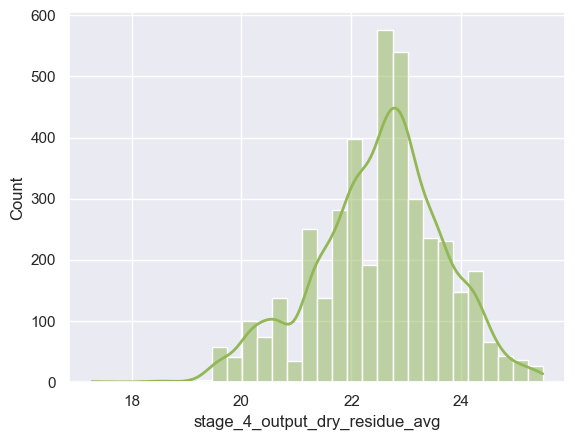

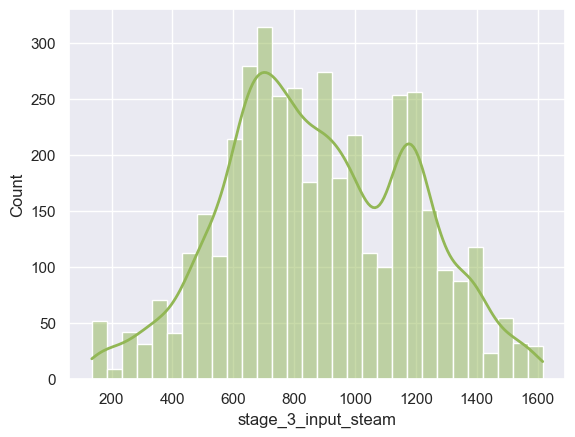

In [ ]:
sns.histplot(gip_7['stage_4_output_dry_residue_avg'], kde=True, bins=30, color=color_for_histplot, line_kws=line)
plt.show()
sns.histplot(gip_7['stage_3_input_steam'], kde=True, bins=30, color=color_for_histplot, line_kws=line)
plt.show()

In [ ]:
raspder(gip_7)

Параметр Распределение
0  stage_4_output_dry_residue_avg  ненормальное
1             stage_3_input_steam  ненормальное

H₀ = Между stage_4_output_dry_residue_avg и stage_3_input_steam нет линейной связи  
H₁ = Между stage_4_output_dry_residue_avg и stage_3_input_steam существует линейная связь

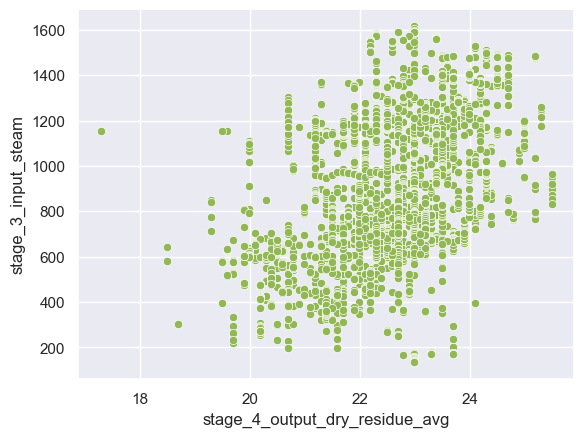

In [ ]:
sns.scatterplot(x='stage_4_output_dry_residue_avg', y='stage_3_input_steam', data=gip_7, color=color_for_histplot)
plt.show()

In [ ]:
cor, p_value = spearmanr(gip_7['stage_4_output_dry_residue_avg'], gip_7['stage_3_input_steam'])
cor, p_value

(0.4677739668603146, 1.2888859460278866e-221)

P-уровень: 1.2888859460278866e-221 > 0.05, отклоняем нулевую гипотезу и принимаем альтернативную гипотезу, поскольку результаты статистического теста показывают, что связь является статистически значимой.

### Гипотеза 8 Количество итогового продукта связано с количеством мягкой воды, поданной на 3м этапе

In [ ]:
gip_8 = df[['stage_4_output_product', 'stage_3_input_soft_water']]
gip_8

stage_4_output_product  stage_3_input_soft_water
0                      47.03                    426.06
1                      45.05                    439.41
2                      43.06                    452.76
3                      46.01                    440.25
4                      48.95                    427.74
...                      ...                       ...
4395                    9.17                    107.02
4396                   10.79                    108.57
4397                    9.27                    124.21
4398                   10.11                    133.94
4399                    9.59                    109.08

[4092 rows x 2 columns]

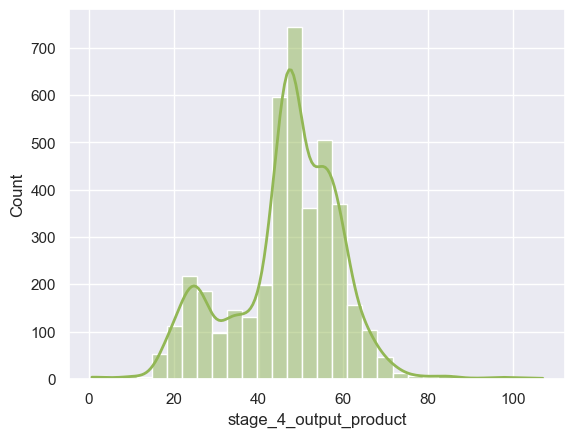

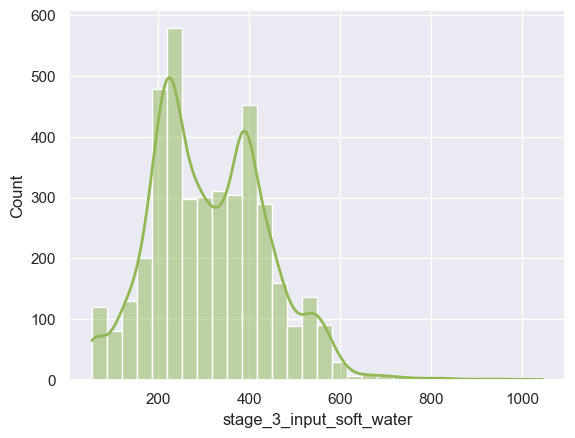

In [ ]:
sns.histplot(gip_8['stage_4_output_product'], kde=True, bins=30, color=color_for_histplot, line_kws=line)
plt.show()
sns.histplot(gip_8['stage_3_input_soft_water'], kde=True, bins=30, color=color_for_histplot, line_kws=line)
plt.show()

In [ ]:
raspder(gip_8)

Параметр Распределение
0    stage_4_output_product  ненормальное
1  stage_3_input_soft_water  ненормальное

H₀ = Между stage_4_output_product и stage_3_input_soft_water нет линейной связи  
H₁ = Между stage_4_output_product и stage_3_input_soft_water существует линейная связь

<Axes: xlabel='stage_4_output_product', ylabel='stage_3_input_soft_water'>

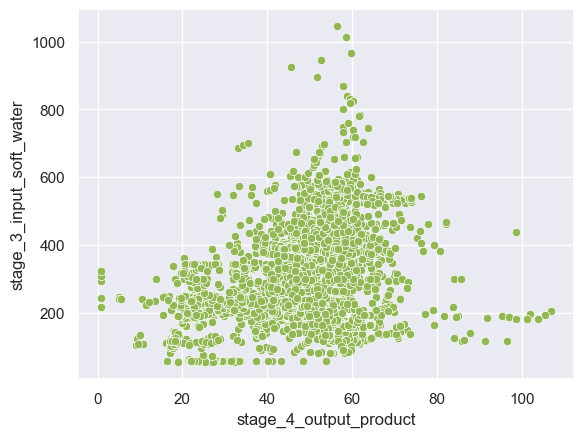

In [ ]:
sns.scatterplot(x='stage_4_output_product', y='stage_3_input_soft_water', data=gip_8, color=color_for_histplot)

In [ ]:
cor, p_value = spearmanr(gip_8['stage_4_output_product'], gip_8['stage_3_input_soft_water'])
cor, p_value

(0.43492215518614175, 1.708350725386925e-188)

P-уровень: 1.708350725386925e-188 > 0.05, отклоняем нулевую гипотезу и принимаем альтернативную гипотезу, поскольку результаты статистического теста показывают, что связь является статистически значимой.

### Гипотеза 9 Процент сухого остатка финального продукта связан с количеством перегретого пара

In [ ]:
gip_9 = df[['stage_4_output_dry_residue_avg', 'stage_4_input_overheated_steam']]
gip_9

stage_4_output_dry_residue_avg  stage_4_input_overheated_steam
0                              21.48                          156.67
1                              21.48                          156.76
2                              21.48                          156.86
3                              21.48                          156.41
4                              21.48                          155.96
...                              ...                             ...
4395                           21.18                          152.90
4396                           21.08                          152.53
4397                           21.08                          152.53
4398                           22.38                          151.80
4399                           22.18                          153.01

[4092 rows x 2 columns]

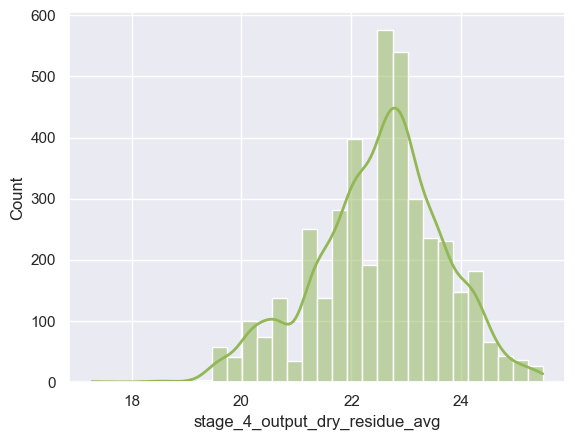

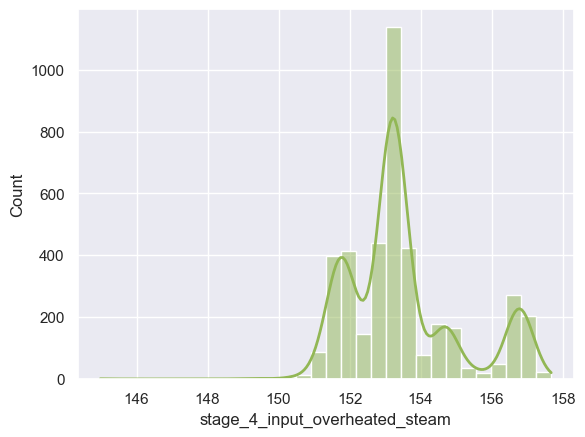

In [ ]:
sns.histplot(gip_9['stage_4_output_dry_residue_avg'], kde=True, bins=30, color=color_for_histplot, line_kws=line)
plt.show()
sns.histplot(gip_9['stage_4_input_overheated_steam'], kde=True, bins=30, color=color_for_histplot, line_kws=line)
plt.show()

In [ ]:
raspder(gip_9)

Параметр Распределение
0  stage_4_output_dry_residue_avg  ненормальное
1  stage_4_input_overheated_steam  ненормальное

H₀ = Между stage_4_input_overheated_steam и stage_4_output_dry_residue_avg нет линейной связи  
H₁ = Между stage_4_input_overheated_steam и stage_4_output_dry_residue_avg существует линейная связь

<Axes: xlabel='stage_4_input_overheated_steam', ylabel='stage_4_output_dry_residue_avg'>

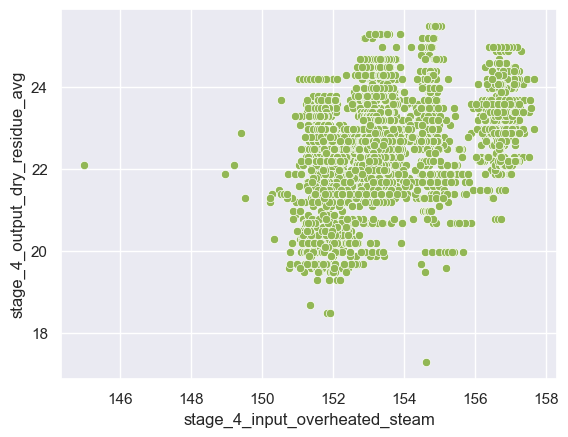

In [ ]:
sns.scatterplot(x='stage_4_input_overheated_steam', y='stage_4_output_dry_residue_avg', data=gip_9, color=color_for_histplot)

In [ ]:
cor, p_value = spearmanr(gip_9['stage_4_input_overheated_steam'], gip_9['stage_4_output_dry_residue_avg'])
cor, p_value

(0.395353580706242, 3.534819682295421e-153)

P-уровень: 3.534819682295421e-153 > 0.05, отклоняем нулевую гипотезу и принимаем альтернативную гипотезу, поскольку результаты статистического теста показывают, что связь является статистически значимой.

### Гипотеза 10 Количество готового продукта связано с температура насыщенного пара

In [ ]:
gip_10 = df[['stage_4_output_product', 'stage_3_output_temp_hum_steam']]
gip_10

stage_4_output_product  stage_3_output_temp_hum_steam
0                      47.03                         108.65
1                      45.05                         108.71
2                      43.06                         108.76
3                      46.01                         108.63
4                      48.95                         108.51
...                      ...                            ...
4395                    9.17                         111.26
4396                   10.79                         110.09
4397                    9.27                         108.65
4398                   10.11                         108.18
4399                    9.59                         110.13

[4092 rows x 2 columns]

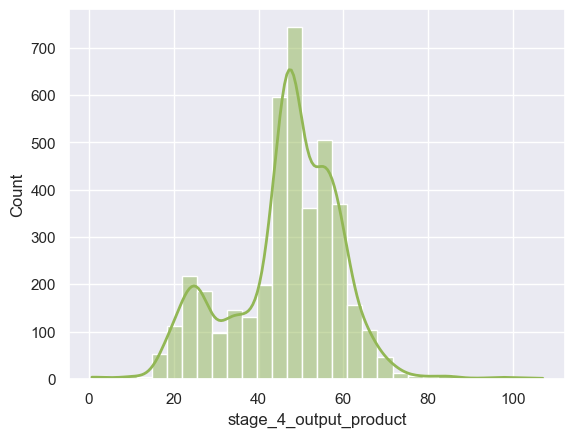

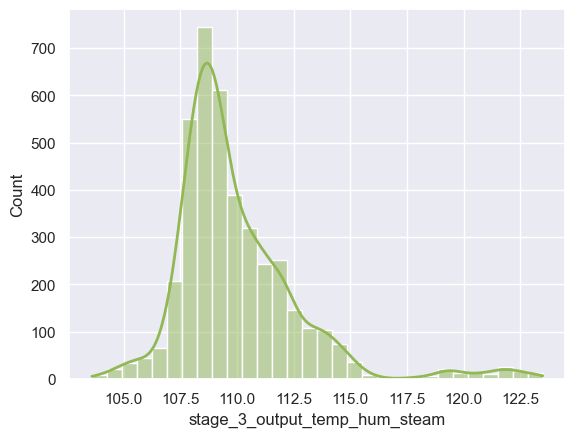

In [ ]:
sns.histplot(gip_10['stage_4_output_product'], kde=True, bins=30, color=color_for_histplot, line_kws=line)
plt.show()
sns.histplot(gip_10['stage_3_output_temp_hum_steam'], kde=True, bins=30, color=color_for_histplot, line_kws=line)
plt.show()

In [ ]:
raspder(gip_10)

Параметр Распределение
0         stage_4_output_product  ненормальное
1  stage_3_output_temp_hum_steam  ненормальное

H₀ = Между stage_4_output_product и stage_3_output_temp_hum_steam нет линейной связи  
H₁ = Между stage_4_output_product и stage_3_output_temp_hum_steam существует линейная связь

In [ ]:
cor, p_value = spearmanr(gip_10['stage_4_output_product'], gip_10['stage_3_output_temp_hum_steam'])
cor, p_value

(0.1565601583020664, 7.193313357432421e-24)

P-уровень: 7.193313357432421e-24 > 0.05, отклоняем нулевую гипотезу и принимаем альтернативную гипотезу, поскольку результаты статистического теста показывают, что связь является статистически значимой.

## Регрессионное моделирование

### Моделирование для доли опасного газа

In [ ]:
df.dropna(subset=['stage_4_output_danger_gas'], inplace=True)

Index(['datetime', 'stage_1_output_konv_avd', 'stage_2_input_water_sum',
       'stage_2_output_bottom_pressure', 'stage_2_output_bottom_temp',
       'stage_2_output_bottom_temp_hum_steam', 'stage_2_output_bottom_vacuum',
       'stage_2_output_top_pressure', 'stage_2_output_top_pressure_at_end',
       'stage_2_output_top_temp', 'stage_2_output_top_vacuum',
       'stage_3_input_pressure', 'stage_3_input_soft_water',
       'stage_3_input_steam', 'stage_3_output_temp_hum_steam',
       'stage_3_output_temp_top', 'stage_4_input_overheated_steam',
       'stage_4_input_polymer', 'stage_4_input_steam', 'stage_4_input_water',
       'stage_4_output_danger_gas', 'stage_4_output_dry_residue_avg',
       'stage_4_output_product', 'work_shift', 'danger_gas_kat'],
      dtype='object')


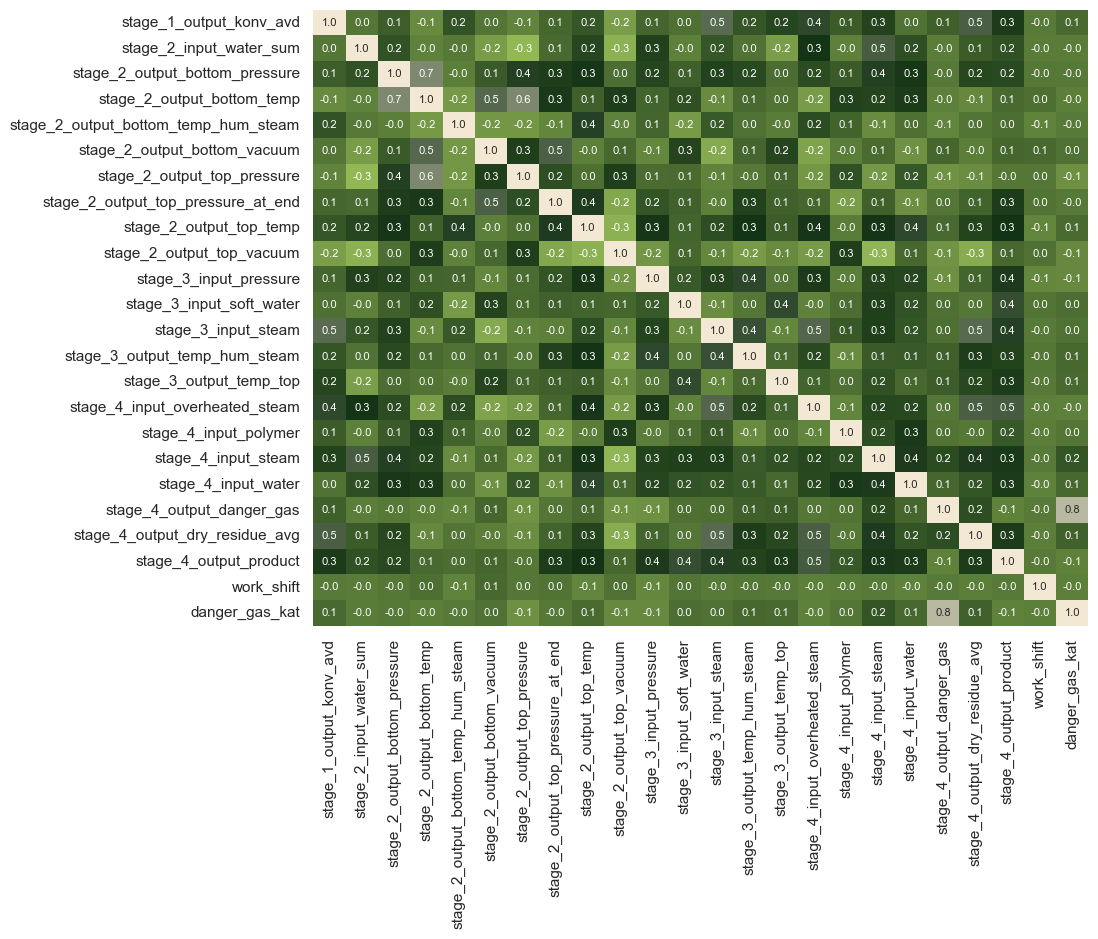

In [ ]:
custom_gradient = LinearSegmentedColormap.from_list("CorporateGradient", corporate_colors)
spec_df = df.drop('datetime', axis=1)
correlation_matrix = spec_df.corr(method='spearman')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap=custom_gradient, fmt='.1f', cbar=False, annot=True, annot_kws={"size": 8})
print(df.columns)

In [ ]:
target_column = 'stage_4_output_danger_gas'
features = df[['stage_1_output_konv_avd', 'stage_2_output_bottom_temp_hum_steam', 'stage_2_output_top_vacuum', 'stage_2_output_top_temp', 'stage_3_input_pressure', 'stage_3_output_temp_hum_steam', 'stage_3_output_temp_top', 'stage_4_input_steam', 'stage_4_input_water']]

In [ ]:
X = features
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
MAPE = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Средняя абсолютная ошибка в процентах (MAPE): {MAPE}")
print(f"Коэффициент детерминации (R^2): {r2}")

Средняя абсолютная ошибка в процентах (MAPE): 0.24206572703185106
Коэффициент детерминации (R^2): 0.04963085170929782


In [ ]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

                                      Coefficient
stage_1_output_konv_avd                  0.000529
stage_2_output_bottom_temp_hum_steam    -0.000097
stage_2_output_top_vacuum               -0.000322
stage_2_output_top_temp                 -0.000091
stage_3_input_pressure                  -0.144420
stage_3_output_temp_hum_steam            0.001507
stage_3_output_temp_top                 -0.000052
stage_4_input_steam                      0.008236
stage_4_input_water                      0.000024


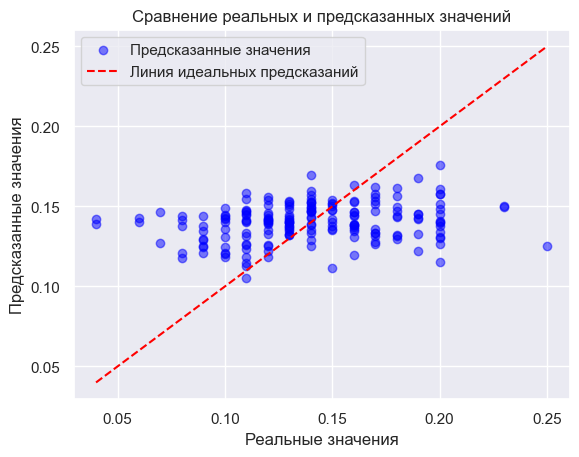

In [ ]:
real_values = y_test
predicted_values = y_pred

plt.scatter(real_values, predicted_values, color='blue', alpha=0.5, label='Предсказанные значения')
plt.plot([min(real_values), max(real_values)], [min(real_values), max(real_values)], color='red', linestyle='--', label='Линия идеальных предсказаний')


plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.title('Сравнение реальных и предсказанных значений')
plt.legend()
plt.grid(True)
plt.show()